# **Business Understanding**

Financial fraud detection is the process of identifying and preventing fraudulent activity in financial transactions, data, and other areas. The goal is to minimize financial losses, protect assets, and ensure regulatory compliance. Knowing that financial fraud is an increasingly prevalent issue, with organizations constantly seeking advanced solutions to detect and prevent suspicious activity. it is essential to have a system that can identify potential threats. This system should be able to track data and activity across all channels, including online, in-person, and over the phone.

Knowing tha such processes cannot be mannually managed by human efforts, many organisations and financial institutions are attempting to implement machine learning tools to track real-time transaction data to spot and prevent possible financial fraudulent activities. Considering such background context, I thought it would be a great practice for me to utilise the powerful tool of machine learning in solving such real-life issue.

# **Data Understanding**

This dataset was inspired by real-world transaction data but was generated synthetically to avoid privacy concerns. It includes key features that play a critical role in fraud detection, such as transaction amounts, device types, geographic locations, currency, card type, and a "fraud" label indicating whether a transaction is suspicious.

Dataset comprises of different categories of data columns:

1. **Comprehensive Transaction Categories**: Transactions span categories like retail (online and in-store), groceries, restaurants (fast food to premium), entertainment (streaming, gaming, events), healthcare, education, gas, and travel.

2. **Geographic and Demographic Variety**: The dataset includes diverse geographic data (countries, cities) and currency types, allowing for analysis on a global scale with varying risk profiles.

3. **Detailed Customer Profiles**: Each transaction is linked to a customer profile that includes characteristics like account age, preferred devices, typical spending range, and fraud-protection features.

# **About dataset**

Purpose of this project is followed by:
**Detecting whether such a transaction is fraudulent transaction activity or not** : using different categories of columns, I will be implementing different machine learning ensemble tools like XGBClassifier, Random Forest, Bagging, Voting, and Stacking

Following information is about each data column:
1. **Transaction ID** : Unique alphanumeric identifier for each transaction; useful for referencing individual transactions.
2. **Customer ID** : Unique ID assigned to each customer; helps track customer activity and behavior across transactions.
3. **Card Number** : A masked card number representing the credit or debit card used; ensures privacy while providing a unique identifier for card-level analysis.
4. **Timestamp** : Timestamp in UTC format indicating when the transaction occurred; facilitates time-based analysis, such as peak hours or fraud detection related to transaction timing.
5. **Merchant Category** : High-level category for the merchant, such as 'Retail' or 'Travel'; aids in identifying spending patterns by category.
6. **Merchant Type** : Specifies the subtype of merchant within each category, such as 'online' for Retail; useful for analyzing customer preferences for specific transaction types.
7. **Merchant** : Name of the merchant where the transaction took place; valuable for merchant-specific analysis, brand loyalty insights, and fraud detection.
8. **Amount** : Transaction amount in the local currency of the transaction's country; useful for monetary trend analysis and fraud detection.
9. **Currency** : Currency code (e.g., USD, EUR) used for the transaction; helps in currency-based aggregations or conversions for global analysis.
10. **Country** : Country where the transaction took place; essential for geographical analysis of spending and cross-border transaction risk assessment.
11. **City** : Name of the city where the transaction was made; provides additional granularity for regional analysis.
12. **City Size** : Classification of the city size (e.g., large, medium); helpful for understanding urban vs. rural transaction behavior.
13. **Card Type** : Type of card used in the transaction, such as 'Gold Credit' or 'Basic Debit'; used to assess patterns and fraud risks associated with different card types.
14. **Card Present** : Boolean indicating if the card was physically present during the transaction; important for differentiating between in-person and online transactions.
15. **Device** : Specific device or browser used for the transaction (e.g., Chrome, iOS App); aids in device-specific security and behavior analysis.
16. **Channel** : Specifies the transaction channel (web, mobile, pos); valuable for understanding channel preferences and detecting anomalies.
17. **Device Fingerprint** : Unique identifier for the device used, generated using hashing; useful in identifying fraudulent behavior across sessions.
18. **IP Address** : IP address used in the transaction, simulated for privacy; essential for tracking potential geo-fraud.
19. **Distance From Home** : Binary indicating whether the transaction occurred outside the customer's home country; can help in fraud detection by highlighting unusual travel patterns.
20. **High Risk Merchant** : Boolean that flags higher-risk merchant categories (e.g., Travel, Entertainment); useful for fraud risk modeling.
21. **Transaction Hour** : The hour (0–23) when the transaction occurred; allows for time-of-day analysis and detection of unusual transaction hours.
22. **Weekend Transaction** : Boolean indicating if the transaction occurred on a weekend; assists in examining behavioral patterns and fraud tendencies on weekends.
23. **Velocity Last Hour** : Dictionary of velocity metrics within the past hour, including: num_transactions: Number of customer transactions in the last hour. total_amount: Total amount spent in the last hour. unique_merchants: Count of unique merchants in the last hour. unique_countries: Count of unique countries in the last hour. max_single_amount: Maximum single transaction amount in the last hour.
24. **Is Fraud** : Binary label for fraud status (True/False); main target variable for fraud detection model training and validation.

# Import Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transactions/synthetic_fraud_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, recall_score, roc_curve, auc
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [3]:
pd.set_option('display.max_columns', 500)

# Dataset Exploration

In [4]:
transaction = pd.read_csv('/kaggle/input/transactions/synthetic_fraud_data.csv')
transaction.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820+00:00,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,Unknown City,medium,Platinum Credit,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,0,False,0,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464+00:00,Entertainment,gaming,Steam,3368.97,BRL,Brazil,Unknown City,medium,Platinum Credit,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,1,True,0,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762+00:00,Grocery,physical,Whole Foods,102582.38,JPY,Japan,Unknown City,medium,Platinum Credit,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,0,False,0,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466+00:00,Gas,major,Exxon,630.60,AUD,Australia,Unknown City,medium,Premium Debit,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,0,False,0,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063+00:00,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,Unknown City,medium,Basic Debit,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,1,False,0,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [5]:
## Identify transaction data's information
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   transaction_id       object 
 1   customer_id          object 
 2   card_number          int64  
 3   timestamp            object 
 4   merchant_category    object 
 5   merchant_type        object 
 6   merchant             object 
 7   amount               float64
 8   currency             object 
 9   country              object 
 10  city                 object 
 11  city_size            object 
 12  card_type            object 
 13  card_present         bool   
 14  device               object 
 15  channel              object 
 16  device_fingerprint   object 
 17  ip_address           object 
 18  distance_from_home   int64  
 19  high_risk_merchant   bool   
 20  transaction_hour     int64  
 21  weekend_transaction  bool   
 22  velocity_last_hour   object 
 23  is_fraud             bool   
dty

Data type of each column needs to be revised ex) timestamp, etc.

In [6]:
## Explore statistical information about transaction data
transaction.describe()

,card_number,amount,distance_from_home,transaction_hour
count,7.483766e+06,7.483766e+06,7.483766e+06,7.483766e+06
mean,4.222100e+15,4.792468e+04,3.220519e-01,1.215467e+01
std,2.341170e+15,1.775562e+05,4.672628e-01,6.536767e+00
min,3.700086e+14,1.000000e-02,0.000000e+00,0.000000e+00
25%,4.004400e+15,3.635300e+02,0.000000e+00,7.000000e+00
50%,5.010745e+15,1.177450e+03,0.000000e+00,1.200000e+01
75%,5.999914e+15,2.242953e+04,1.000000e+00,1.800000e+01
max,6.999728e+15,6.253153e+06,1.000000e+00,2.300000e+01


Certainly both amount and transaction hour columns need to be investigated considering their mean value greater than the median value

In [7]:
## Explore dimension of the data
print(transaction.shape)

(7483766, 24)


seems like sampling is a must considering huge size of the dataset

In [8]:
## sample the dataset
transaction_sample = transaction.sample(n = 250000, random_state = 21).reset_index(drop = True)

# Data Preprocessing

In [9]:
transaction_sample.head()

,transaction_id,customer_id,card_number,timestamp,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,device_fingerprint,ip_address,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,velocity_last_hour,is_fraud
0,TX_b5b17800,CUST_46478,5699657752967952,2024-10-07 17:14:22.181495+00:00,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,False,Firefox,web,ce7db67743bf5fffdfa5b2ecfb4e6de0,140.170.128.51,0,True,17,False,"{'num_transactions': 27, 'total_amount': 25271...",False
1,TX_9c391f0e,CUST_49102,371384150413036,2024-10-16 14:20:16.817017+00:00,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,False,Chrome,web,d654a7f29023652d55a4574b8fc6ea4a,45.93.44.23,0,False,14,False,"{'num_transactions': 437, 'total_amount': 1567...",False
2,TX_c006b556,CUST_60071,379239643871947,2024-10-30 16:30:10.768556+00:00,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,False,Safari,web,6d945d3387a7d9eb150ec7d30bd3d621,52.255.14.155,0,True,16,False,"{'num_transactions': 6, 'total_amount': 340463...",False
3,TX_1ec4e8e0,CUST_85188,6915403402912841,2024-10-03 08:21:32.928515+00:00,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,False,Edge,web,4af6ed569634c7b9311dc6968b50e29e,65.194.56.96,1,False,8,False,"{'num_transactions': 944, 'total_amount': 2583...",True
4,TX_6b0f6cba,CUST_12828,376941479073646,2024-10-08 22:41:26.566924+00:00,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,False,Firefox,web,fcaf3544fe07e389572c90dc02921857,193.111.77.221,0,False,22,False,"{'num_transactions': 148, 'total_amount': 2367...",False


In [10]:
## Drop PII that might be unncessary in performing further regression task
transaction_sample.drop(['transaction_id', 'customer_id', 'card_number', 'ip_address', 'device_fingerprint'], axis = 1, inplace = True)

In [11]:
## Convert Boolean values into int 
boolean_dtype = transaction_sample.select_dtypes('boolean').columns
for boolean_col in boolean_dtype:
    transaction_sample[boolean_col] = transaction_sample[boolean_col].astype('int')

In [12]:
## Convert timestamp column into different data type
transaction_sample['timestamp'] = pd.to_datetime(transaction_sample['timestamp'], format='ISO8601')

In [13]:
## Extract velocity last hour column values
import ast

# Parse all entries in 'velocity_last_hour' column once
parsed_data = []
for value in transaction_sample['velocity_last_hour']:
    try:
        # Parse each value as a dictionary
        parsed_data.append(ast.literal_eval(value) if isinstance(value, str) else value)
    except (ValueError, SyntaxError):
        # In case of parsing error, append a default dictionary with None values
        parsed_data.append({
            'num_transactions': None,
            'total_amount': None,
            'unique_merchants': None,
            'unique_countries': None,
            'max_single_amount': None
        })

# Convert parsed data to columns
transaction_sample['num_transactions'] = [int(item.get('num_transactions', 0)) for item in parsed_data]
transaction_sample['total_amount'] = [float(item.get('total_amount', 0)) for item in parsed_data]
transaction_sample['unique_merchants'] = [int(item.get('unique_merchants', 0)) for item in parsed_data]
transaction_sample['unique_countries'] = [int(item.get('unique_countries', 0)) for item in parsed_data]
transaction_sample['max_single_amount'] = [float(item.get('max_single_amount', 0)) for item in parsed_data]

# Drop velocity_last_hour column
transaction_sample.drop('velocity_last_hour', axis = 1, inplace = True)

In [14]:
## Extract year, month, day, etc.
def modify_timestamp():
    transaction_sample['year'] = transaction_sample['timestamp'].dt.year
    transaction_sample['month'] = transaction_sample['timestamp'].dt.month
    transaction_sample['day'] = transaction_sample['timestamp'].dt.day
    transaction_sample['hour'] = transaction_sample['timestamp'].dt.hour
    transaction_sample['minute'] = transaction_sample['timestamp'].dt.minute
    transaction_sample['second'] = transaction_sample['timestamp'].dt.second
    transaction_sample['microsecond'] = transaction_sample['timestamp'].dt.microsecond
    transaction_sample.drop('timestamp', axis = 1, inplace = True)

modify_timestamp()

In [15]:
transaction_sample.head() 

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond
0,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,0,Firefox,web,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495
1,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,0,Chrome,web,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017
2,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,0,Safari,web,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556
3,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,0,Edge,web,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515
4,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,0,Firefox,web,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924


In [16]:
transaction_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   merchant_category    250000 non-null  object 
 1   merchant_type        250000 non-null  object 
 2   merchant             250000 non-null  object 
 3   amount               250000 non-null  float64
 4   currency             250000 non-null  object 
 5   country              250000 non-null  object 
 6   city                 250000 non-null  object 
 7   city_size            250000 non-null  object 
 8   card_type            250000 non-null  object 
 9   card_present         250000 non-null  int64  
 10  device               250000 non-null  object 
 11  channel              250000 non-null  object 
 12  distance_from_home   250000 non-null  int64  
 13  high_risk_merchant   250000 non-null  int64  
 14  transaction_hour     250000 non-null  int64  
 15  weekend_transacti

In [17]:
transaction_sample.isna().sum()

merchant_category      0
merchant_type          0
merchant               0
amount                 0
currency               0
country                0
city                   0
city_size              0
card_type              0
card_present           0
device                 0
channel                0
distance_from_home     0
high_risk_merchant     0
transaction_hour       0
weekend_transaction    0
is_fraud               0
num_transactions       0
total_amount           0
unique_merchants       0
unique_countries       0
max_single_amount      0
year                   0
month                  0
day                    0
hour                   0
minute                 0
second                 0
microsecond            0
dtype: int64

luckily no NA values !

In [18]:
transaction_sample.duplicated().sum()

0

Same with duplicated values

Now it seems that the data has been well cleaned for further EDA

# EDA

In [19]:
## Select only int or float valued columns
numerical_cols = transaction_sample.select_dtypes(include = ['int', 'float']).columns

## Remove those boolean valued columns converted into int & date related fields
numerical_cols = numerical_cols.drop([
    'card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction', 'is_fraud', 'year', 'month', 'day', 'hour', 'minute', 'second',
    'microsecond'
])

In [20]:
transaction_sample['amount']

0            169.37
1            823.67
2          21948.66
3           1602.46
4             89.80
            ...    
249995    513136.06
249996       925.19
249997       425.03
249998        27.31
249999    177666.12
Name: amount, Length: 250000, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

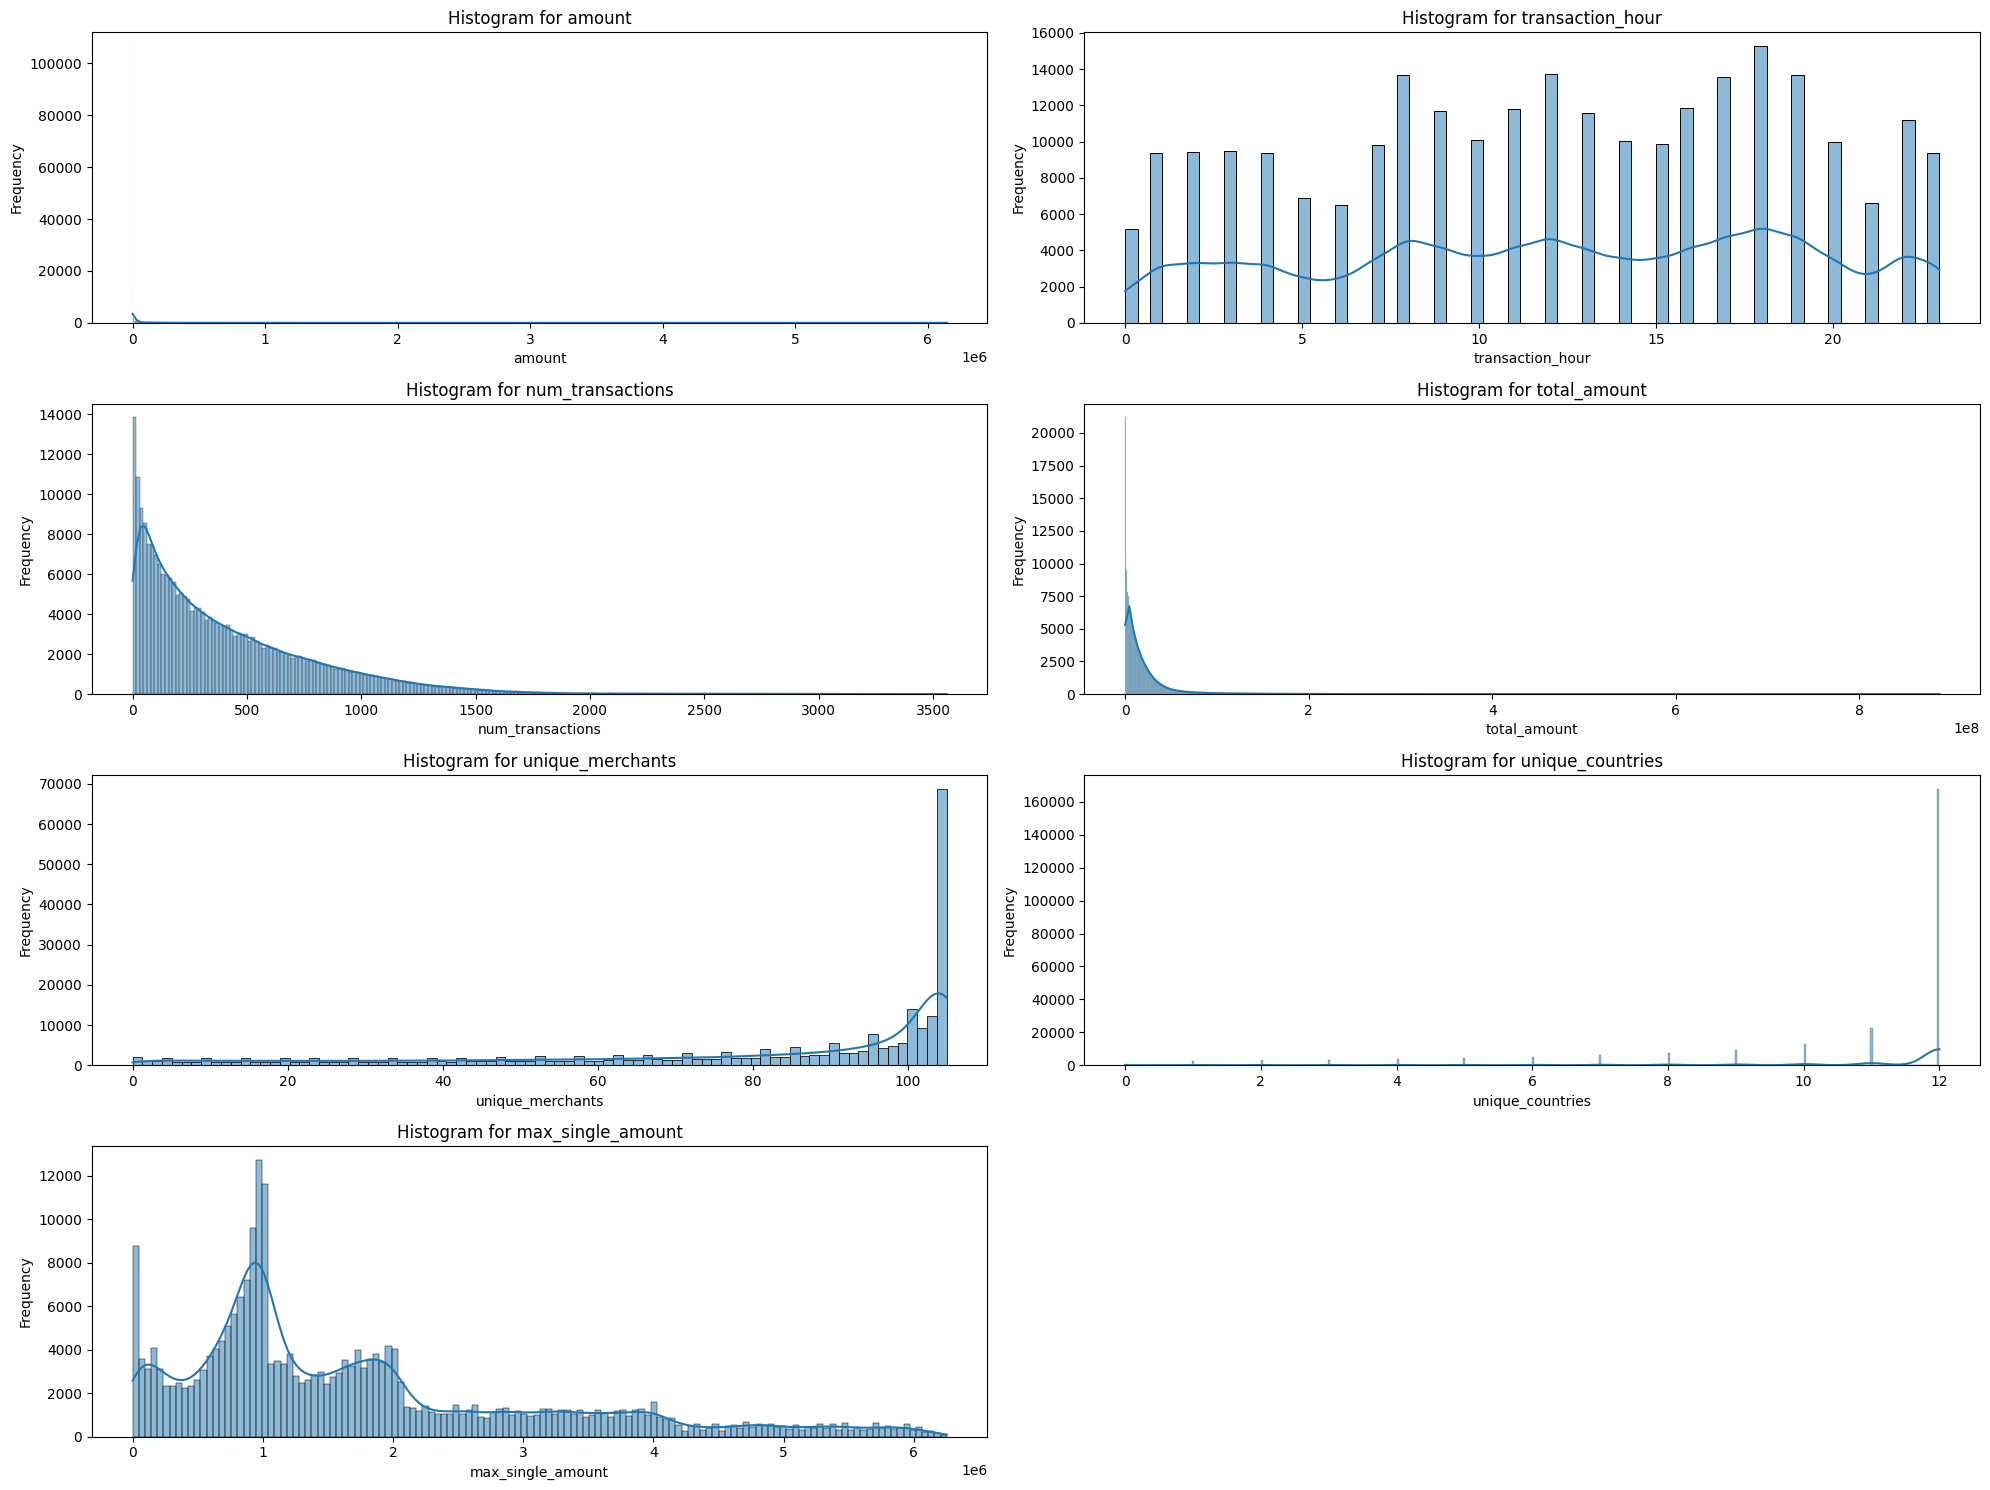

In [21]:
# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(numerical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(numerical_cols):
    sns.histplot(data=transaction_sample, x=col, ax=axes[i], kde = True)
    axes[i].set_title(f'Histogram for {col}')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key things to note
* Certainly the amount column must be checked in terms of Boxplot considering its weird distribution
* number of transaction & total amount columns are rightly skewed and hence can be performed of log transformation for better modelling result
* unique merchants column is leftly skewed and can be performed of log transformation for similar purpose
* max single amount seems to have distributed normally but with some outliers so need to be checked in a boxplot

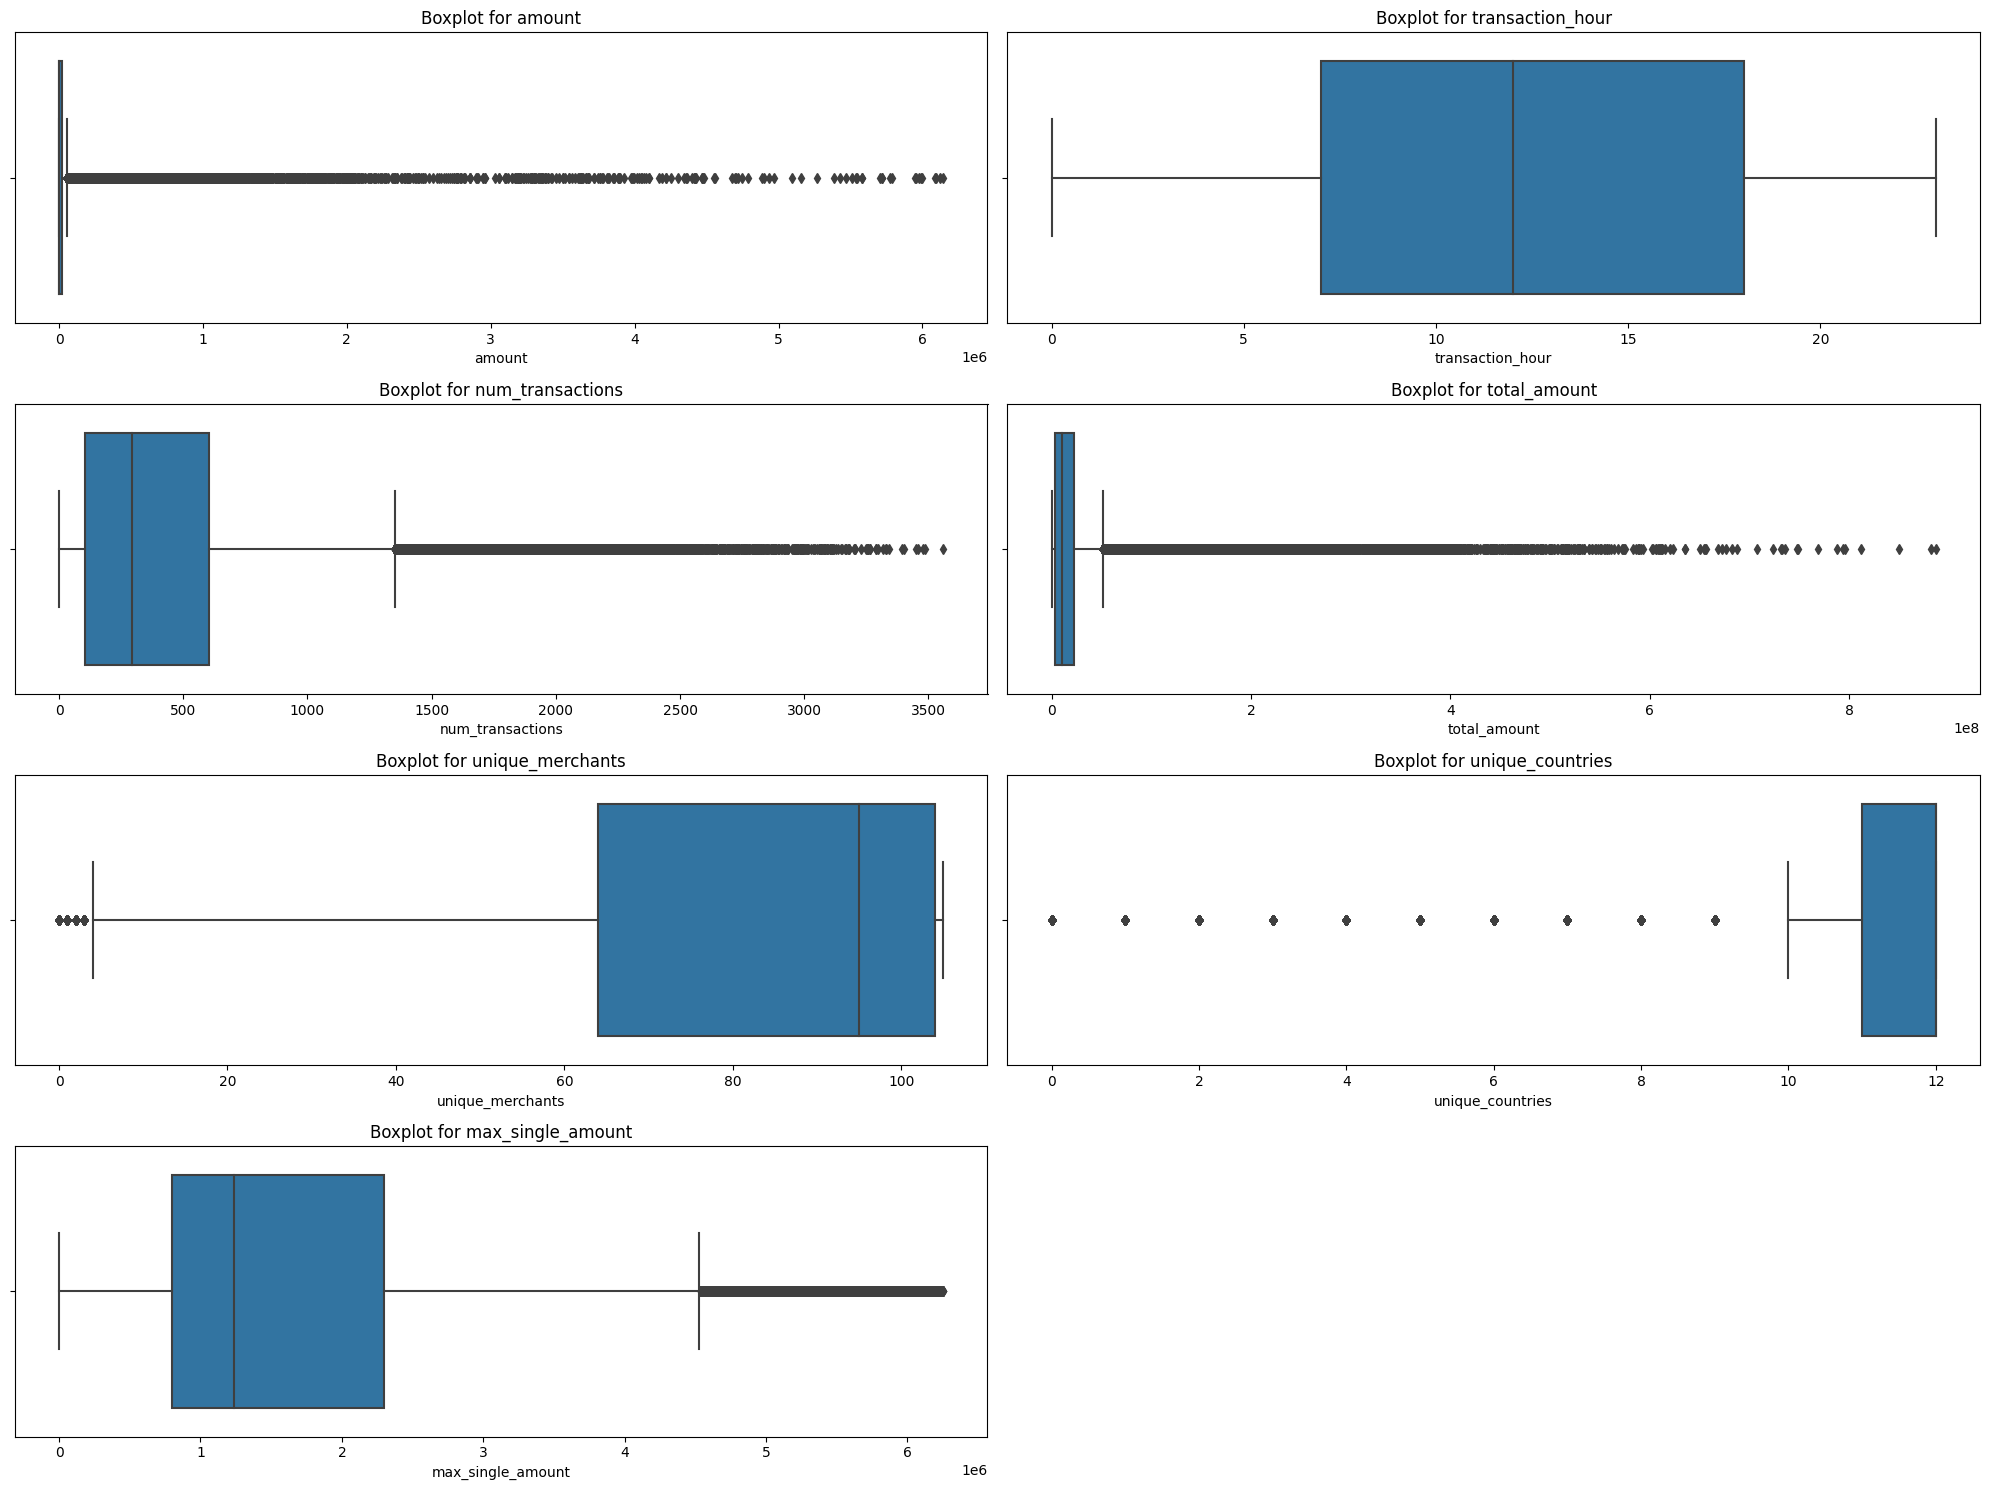

In [22]:
# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(numerical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 15))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=transaction_sample, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

what can be seen from this is that the numerical columns tend to possess large volume of outliers. So let's check the actual number of such outliers

In [23]:
def check_outliers():
    for col in numerical_cols:
        q1 = transaction_sample[col].quantile(0.25)
        q3 = transaction_sample[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        
        outlier_count = len(transaction_sample[(transaction_sample[col] > upper) | (transaction_sample[col] < lower)])
        print(f'Outlier Count for {col} : {outlier_count}')

check_outliers()

Outlier Count for amount : 38262
Outlier Count for transaction_hour : 0
Outlier Count for num_transactions : 6907
Outlier Count for total_amount : 18546
Outlier Count for unique_merchants : 4074
Outlier Count for unique_countries : 46363
Outlier Count for max_single_amount : 15286


Considering the entire dataset with 250000 data records, removing outliers would not affect the prediction by a lot. Nevertheless, taking the result of histogram also into apart, the data should rather go through **MinMaxScaler** to reduce the impact of outliers

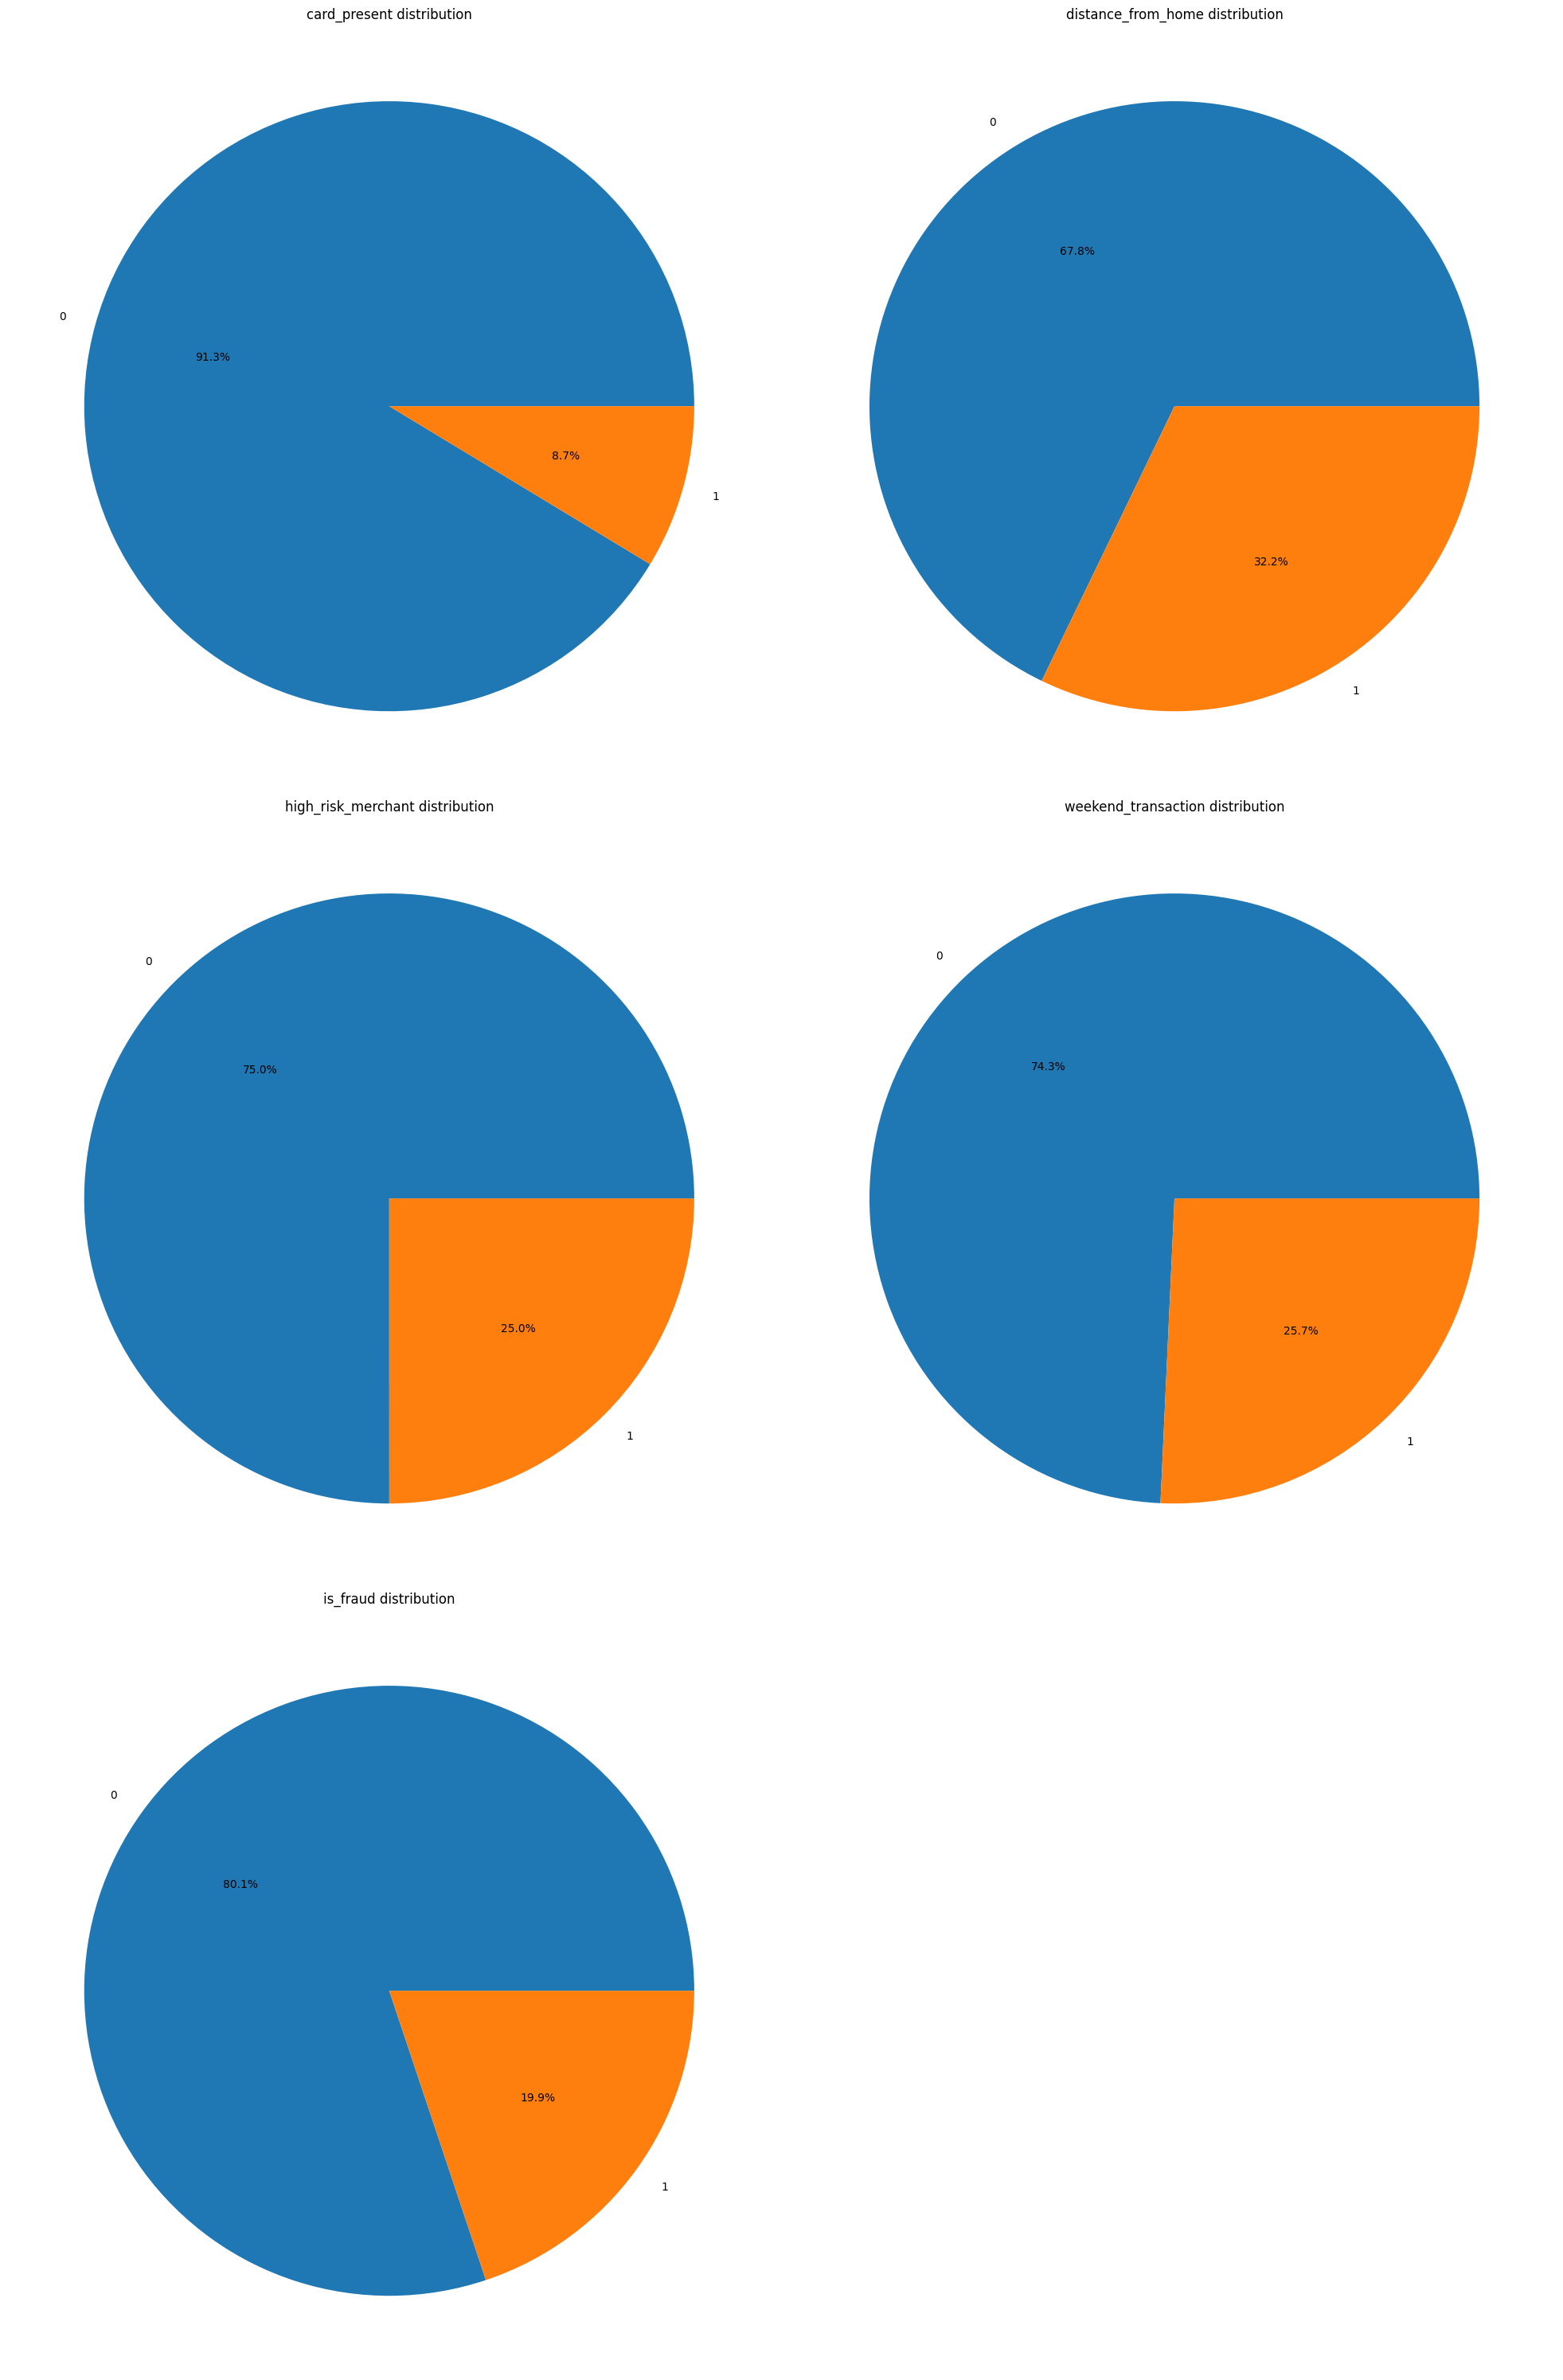

In [24]:
binary_cols = ['card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction', 'is_fraud']

# Adjust the number of rows and columns for subplots
ncol = 2
nrow = len(binary_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(20, 30))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(binary_cols):
    value_counts = transaction_sample[col].value_counts(normalize=True)
    value_counts.plot.pie(ax=axes[i], autopct='%1.1f%%')  
    axes[i].set_title(f'{col} distribution')
    axes[i].set_ylabel('')  

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [25]:
## Get the name of entire categorical features
categorical_cols = list(transaction_sample.select_dtypes('object').columns)
categorical_cols.extend(['card_present', 'distance_from_home', 'high_risk_merchant', 'weekend_transaction'])
categorical_cols.remove('merchant')
categorical_cols

['merchant_category',
 'merchant_type',
 'currency',
 'country',
 'city',
 'city_size',
 'card_type',
 'device',
 'channel',
 'card_present',
 'distance_from_home',
 'high_risk_merchant',
 'weekend_transaction']

Knowing that all boolean columns are unbalanced, using > ***upsampling*** or > ***downsampling*** would help before modelling

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

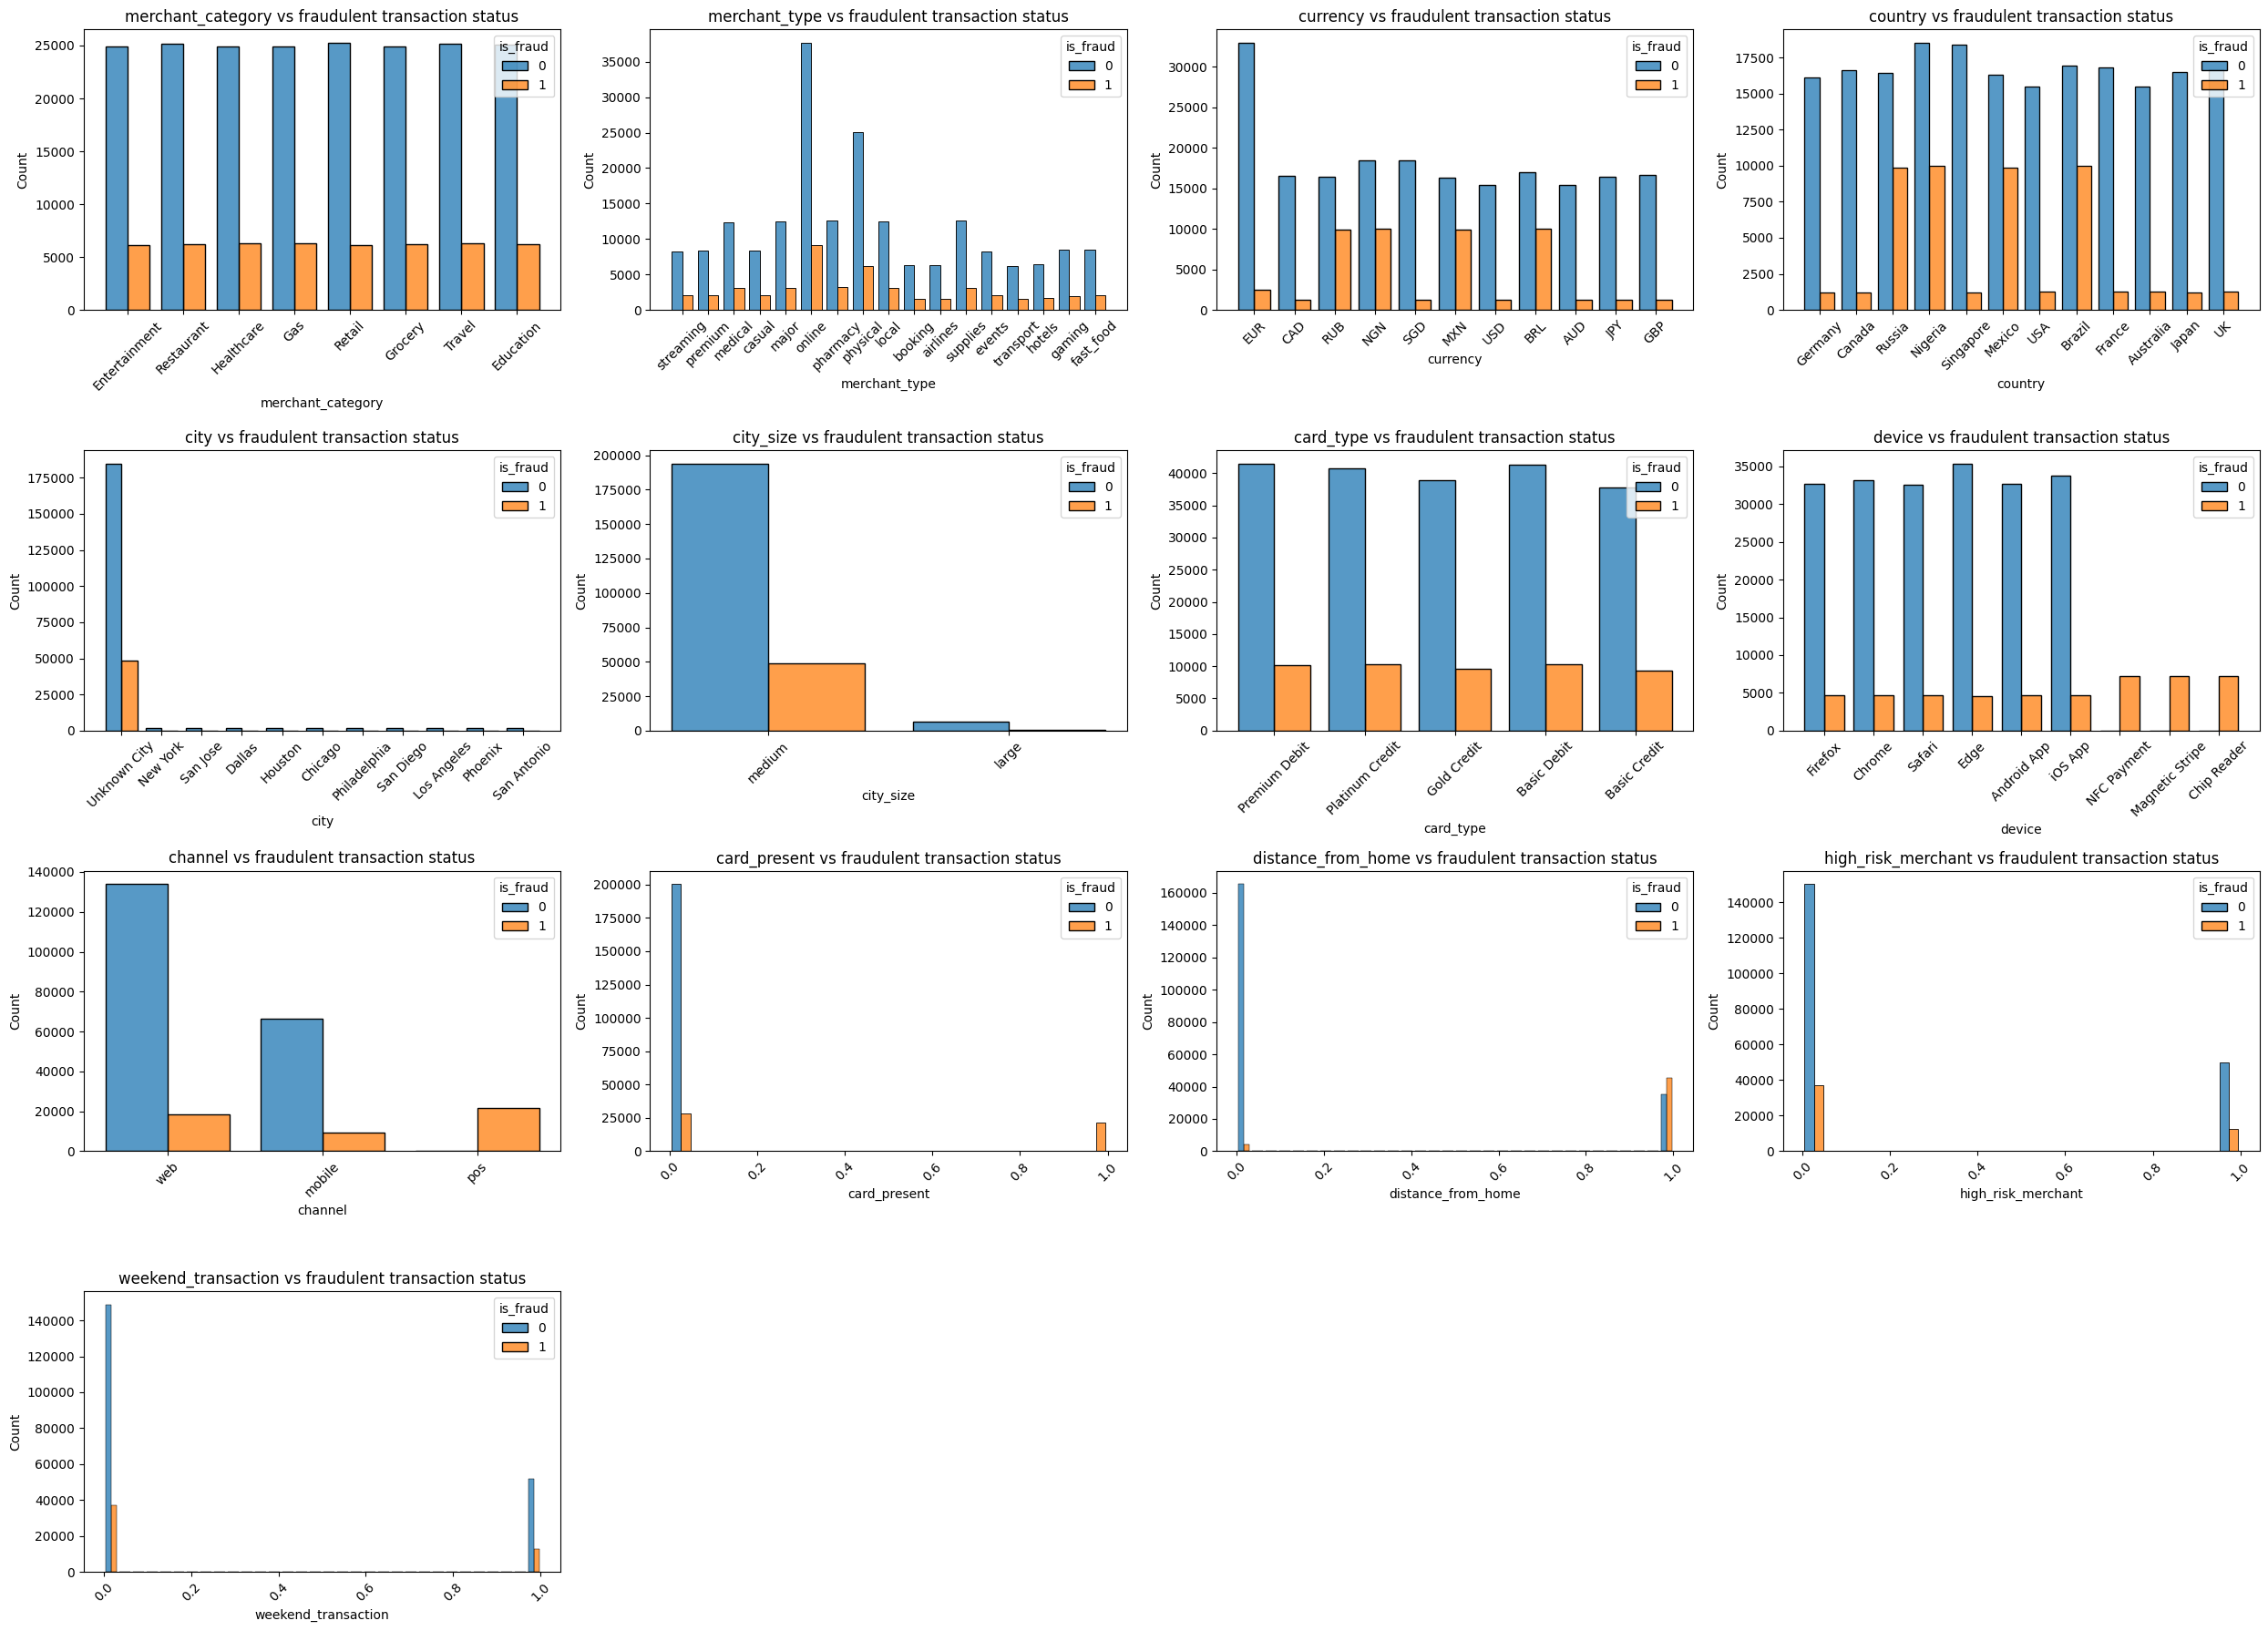

In [26]:
# Adjust the number of rows and columns for subplots
ncol = 4
nrow = len(categorical_cols) // ncol + 1

fig, axes = plt.subplots(nrow, ncol, figsize=(25, 18))
axes = axes.flatten()  # Flatten axes for easier indexing

for i, col in enumerate(categorical_cols):
    sns.histplot(data=transaction_sample, x=col, hue = 'is_fraud', multiple = 'dodge', shrink = 0.8, ax=axes[i])
    axes[i].set_title(f'{col} vs fraudulent transaction status')
    axes[i].tick_params(axis = 'x', rotation = 45)
    
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Key things to note
1. no signficant difference among different merchant categories
2. online merchant type contained both the highest number of fraudulent and non fraudulent transaction -> indicates
online merchant goes through large volume of transaction
3. RUB, NGN, MXN, BRL are the currencies with large volume of fraudulent transactions while other
key currencies like euroes or usd go through way much less fraudulent transactions
4. Country follows similar trend like the currency -> Russia, Nigeria, Mexico, Brazil 
5. Unknown city contains the highest volume of fraudulent transactions while other cities in US contain 
dismissable amount / moreover, for large sized city contains almost no fraudulent transaction activities 
while medium sized city contains almost 50000
6. card type did not have a particular trend of fraudulent transaction activities as all card types showed similar distribution
7. for devices used in transaction, NFC Payment, magenetic stripe, and chip reader contained only fraudulent transactions
while other devices contained higher non fraudulent transactions
8. POS system contained only fraudulent transactions while others did not
9. comparing in person and online transaction, in person transaction only contained fraudulent transactions
10. fraudulent transaction activities were higher on home countries where its number exceeded non fraudulent activities


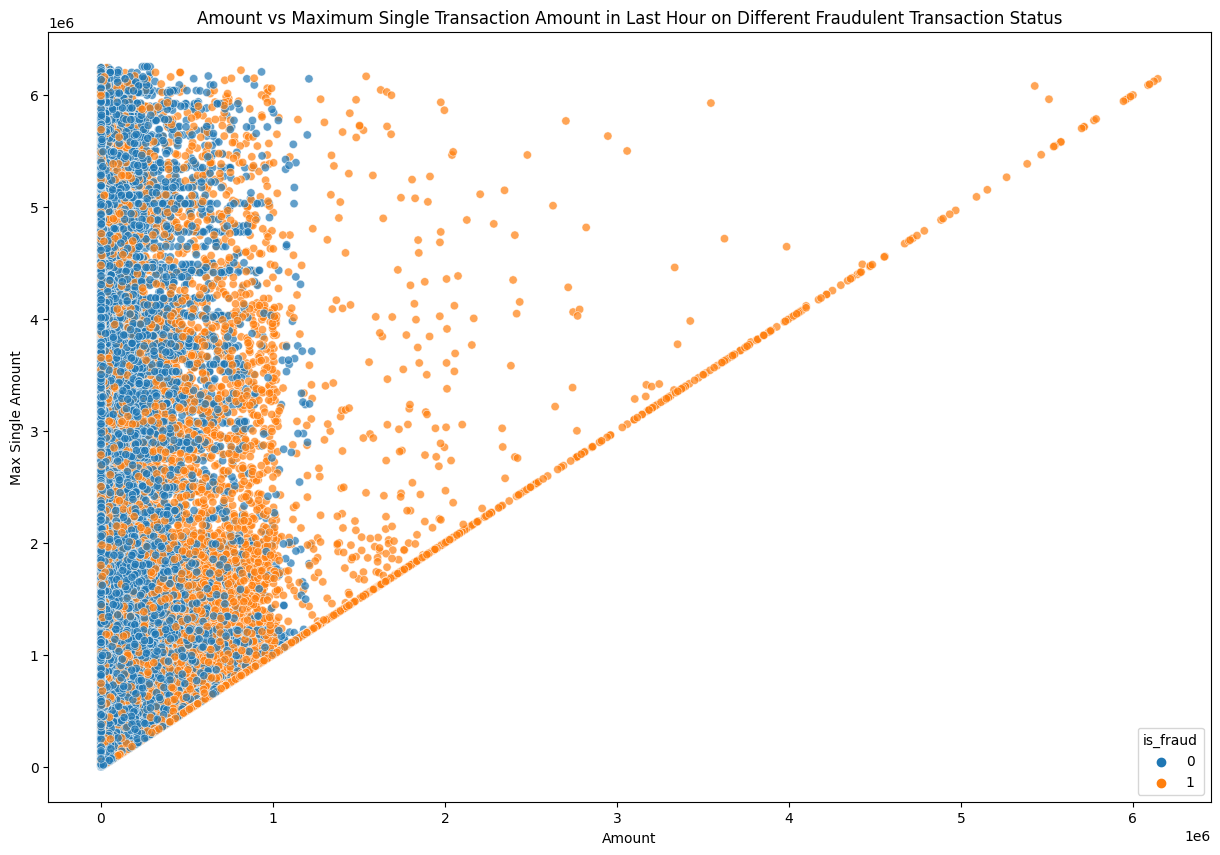

In [27]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=transaction_sample, x='amount', y='max_single_amount', hue='is_fraud', alpha=0.7)
plt.title('Amount vs Maximum Single Transaction Amount in Last Hour on Different Fraudulent Transaction Status')
plt.xlabel('Amount')
plt.ylabel('Max Single Amount')
plt.show()

> ***No linear relationship can be spotted indicating that amount and max single amount columns are not correlated***

From the EDA of categorical variables, countries like Russia, Nigeria, Mexico, Brazil contained higher number of fraudulent transactions. So I will be exploring transactiosn specifically on such countries 

In [28]:
## Specific exploration on particular countries with higher proportion of fraudulent transactions
country_specific = transaction_sample[transaction_sample['country'].isin(['Russia', 'Nigeria', 'Mexico', 'Brazil'])]
country_vis = country_specific.groupby(['country', 'is_fraud'])['amount'].agg('median').reset_index()
country_vis

,country,is_fraud,amount
0,Brazil,0,2084.780
1,Brazil,1,3811.930
2,Mexico,0,8268.815
3,Mexico,1,14976.800
4,Nigeria,0,174883.120
5,Nigeria,1,294516.610
6,Russia,0,31081.490
7,Russia,1,56978.935


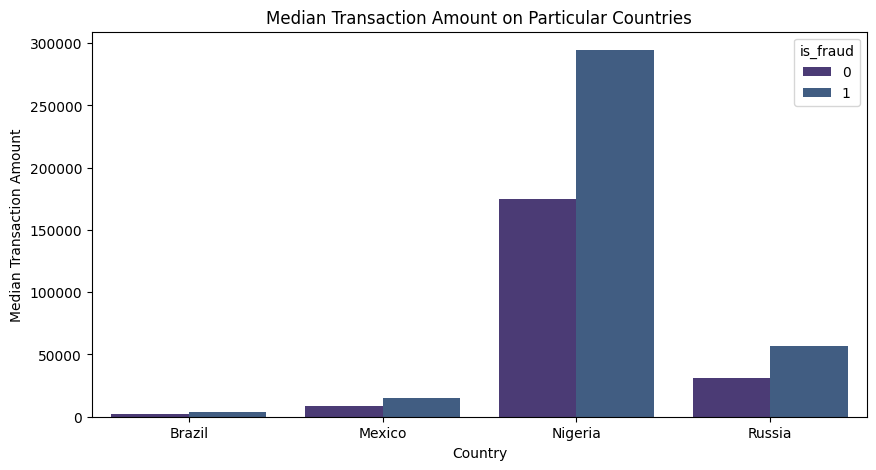

In [29]:
## Amount of Transaction compared among different countries with different fraud status
plt.figure(figsize=(10, 5))
sns.barplot(data = country_vis, x = 'country', y = 'amount', hue = 'is_fraud', palette = sns.color_palette("viridis"))
plt.title('Median Transaction Amount on Particular Countries')
plt.xlabel('Country')
plt.ylabel('Median Transaction Amount')
plt.show()

All those countries had higher transaction amount for fraudulent transactions compared to that of normal transactions. Among them, Nigeria had the highest transaction amount compared to other countries.  

In [30]:
## Separate all transactions happened at Nigeria which its amount was abnormally high
nigeria_high_amount = transaction_sample[(transaction_sample['country'] == 'Nigeria') & (transaction_sample['amount'] > 294516)]
print(f'number of abnormal transactions at Nigeria : {nigeria_high_amount.shape[0]}')

number of abnormal transactions at Nigeria : 9020


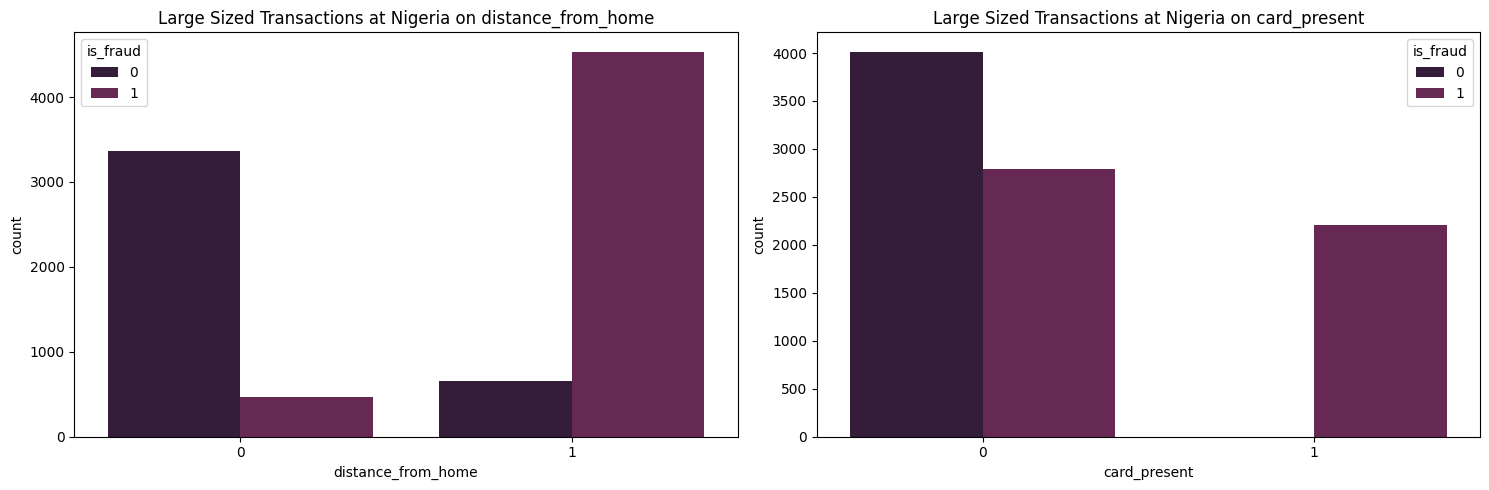

In [31]:
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = nigeria_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('rocket'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Nigeria on {col}')

plt.tight_layout()
plt.show()

Clients who have transacted quite large amount which is greater than the median value of transaction amount at Nigeria are not originally from Nigeria, instead they just performed transaction at Nigeria and for those who performed transaction outside the home country at Nigeria have higher proportion of fraudulent transaction activities. Moreover offline transactions contained more proportion of normal transactions while online transaction only contained fraudulent transactions.

Let's check if other countries like Russia, Mexico and Brazil follow similar pattern.

number of abnormal transactions at Brazil : 8272


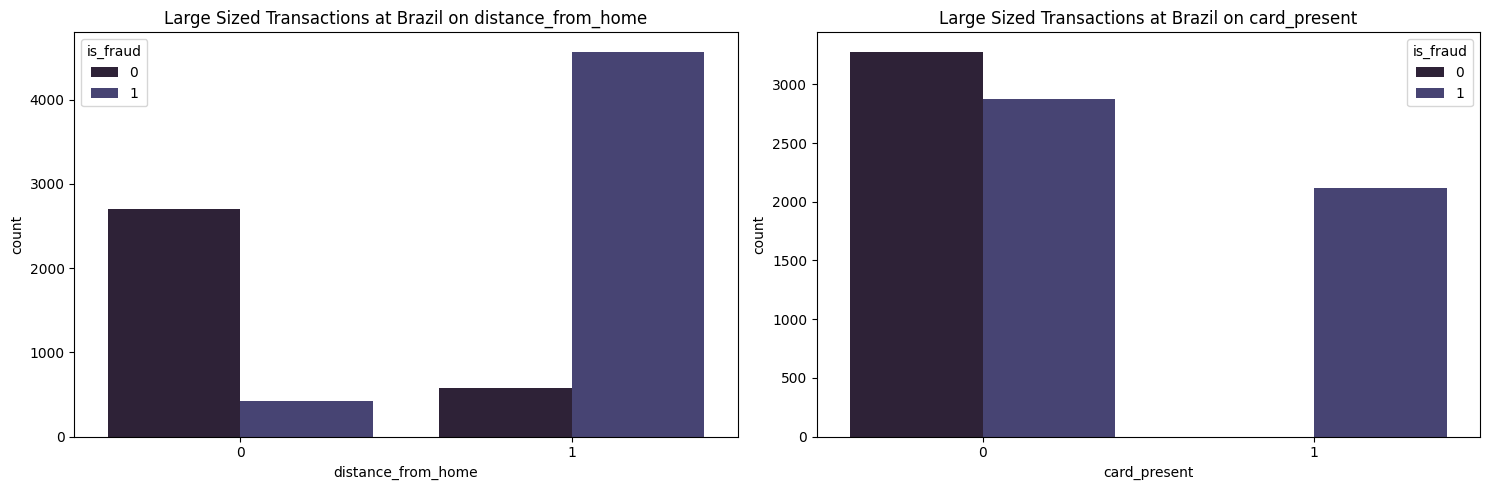

In [32]:
## Perform similar process for Brazil
brazil_high_amount = transaction_sample[(transaction_sample['country'] == 'Brazil') & (transaction_sample['amount'] > 3811)]
print(f'number of abnormal transactions at Brazil : {brazil_high_amount.shape[0]}')
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = brazil_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('mako'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Brazil on {col}')

plt.tight_layout()
plt.show()

number of abnormal transactions at Russia : 8066


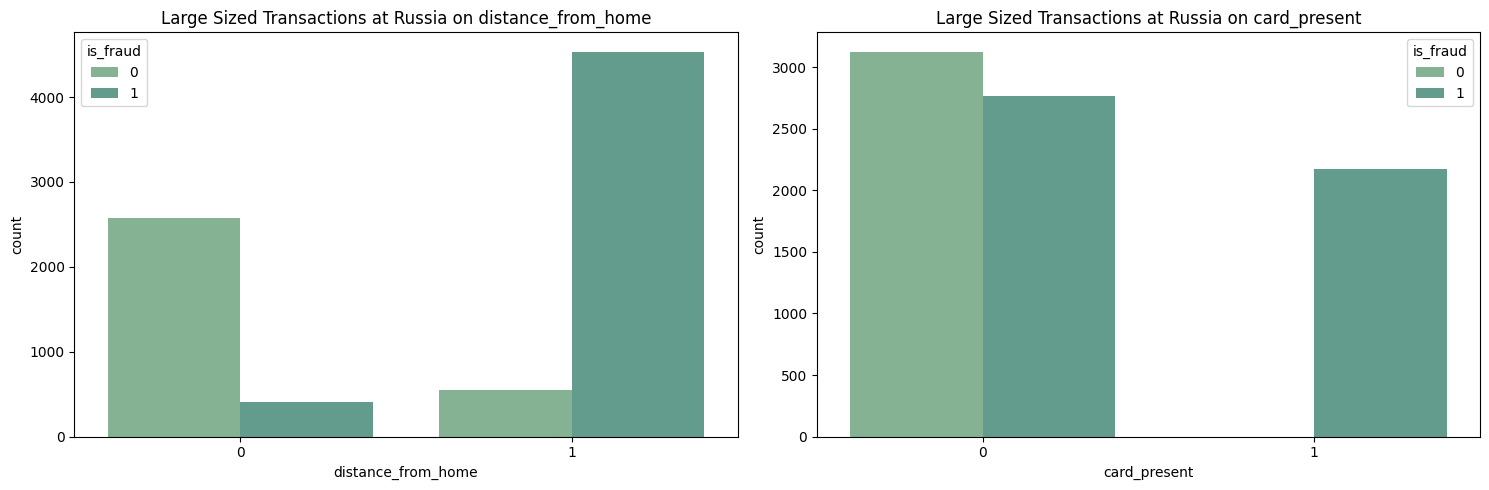

In [33]:
## Perform similar process for Russia
russia_high_amount = transaction_sample[(transaction_sample['country'] == 'Russia') & (transaction_sample['amount'] > 56978)]
print(f'number of abnormal transactions at Russia : {russia_high_amount.shape[0]}')
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = russia_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('crest'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Russia on {col}')

plt.tight_layout()
plt.show()

number of abnormal transactions at Mexico : 8044


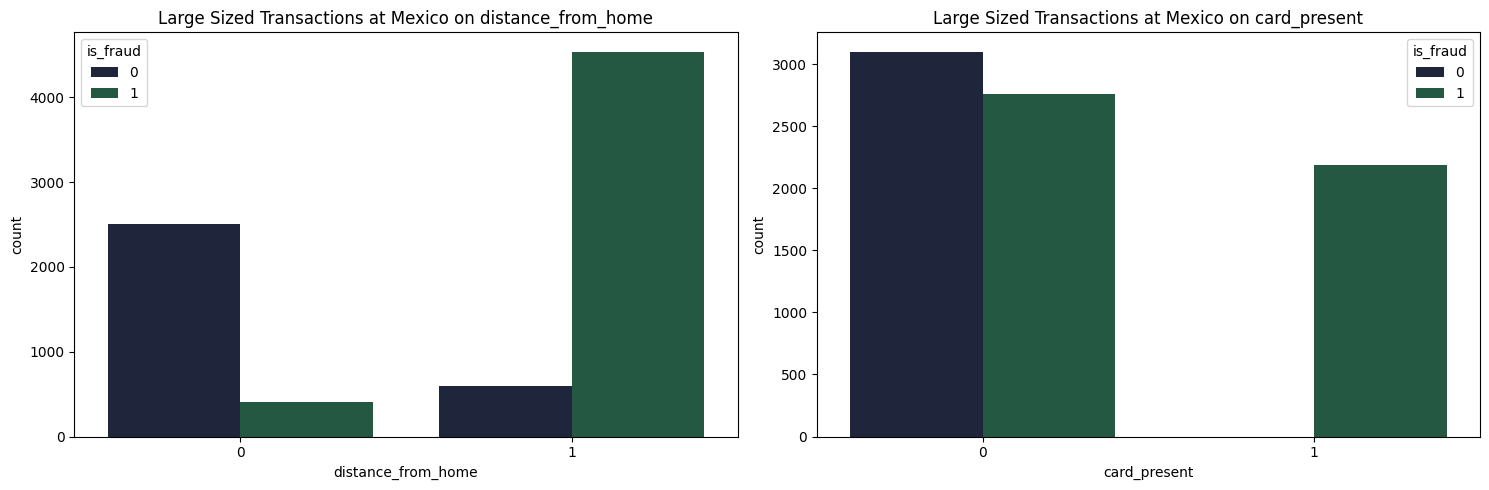

In [34]:
## Perform similar process for Mexico
mexico_high_amount = transaction_sample[(transaction_sample['country'] == 'Mexico') & (transaction_sample['amount'] > 14976)]
print(f'number of abnormal transactions at Mexico : {mexico_high_amount.shape[0]}')
cols = ['distance_from_home', 'card_present']

## Visualisation
fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(cols):
    tmp_data = mexico_eda = mexico_high_amount[[col, 'is_fraud']].value_counts().reset_index()
    sns.barplot(tmp_data, x = col, y = 'count', hue = 'is_fraud', palette = sns.color_palette('cubehelix'), ax = axes[i])
    axes[i].set_title(f'Large Sized Transactions at Mexico on {col}')

plt.tight_layout()
plt.show()

Among those countries which had higher proportion of fraudulent transactions with its transaction amount greater than median transaction amount,  there has been more number of foreigners dealing with large amount of transactions that are fraudulent and for those transactions occured online were all fraudulent.

> **Fraudulent transactions found at Russia, Mexico, Nigeria, Brazil are done by foreigners at online platform at a large sized scale**

Next column we should explore considering previous result from analysis of categorical variables is > ***device***. This is because specifically devices like NFC Payment, magenetic stripe, and chip reader contained only fraudulent transactions while other devices contained higher non fraudulent transactions.

In [35]:
## Exploring median amount of transaction for different devices and different transaction status
tr_amount_device = transaction_sample.groupby(['device', 'is_fraud'])[['amount']].agg('median').reset_index()
tr_amount_device

,device,is_fraud,amount
0,Android App,0,854.830
1,Android App,1,5821.765
2,Chip Reader,1,5649.475
3,Chrome,0,973.010
4,Chrome,1,6116.260
5,Edge,0,858.820
6,Edge,1,4868.610
7,Firefox,0,884.125
8,Firefox,1,6264.610
9,Magnetic Stripe,1,5780.050


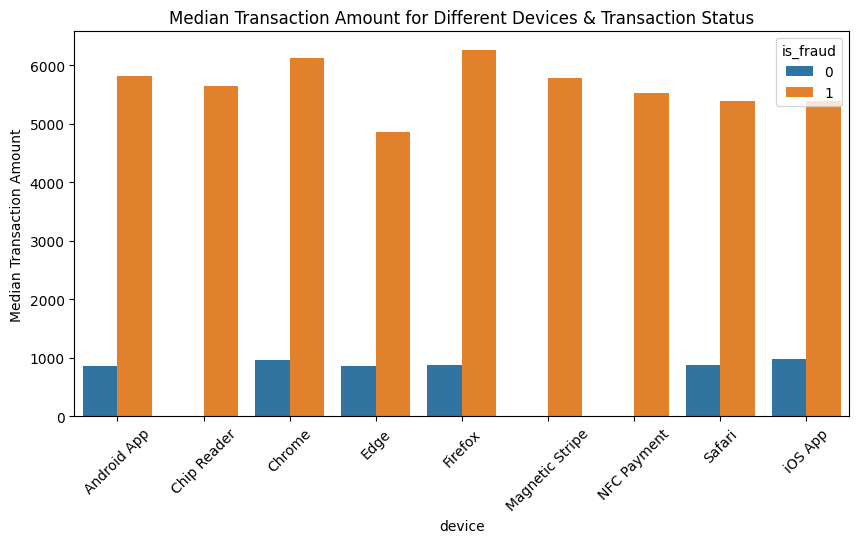

In [36]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.barplot(data = tr_amount_device, x = 'device', y = 'amount', hue = 'is_fraud')
plt.title('Median Transaction Amount for Different Devices & Transaction Status')
plt.ylabel('Median Transaction Amount')
plt.xticks(rotation = 45)
plt.show()

Regardless of device type, median amount of transaction is way much higher for fraudulent transactions than that of non fraudulent transactions. More specifically, Chip Reader, Magnetic Stripe and NFC Payment did not contain any normal transactions which should be explored more.

In [37]:
## Exploring Chip Reader, Magnetic Stripe and NFC Payment
weird_device = transaction_sample[transaction_sample['device'].isin(['Chip Reader', 'Magnetic Stripe', 'NFC Payment'])]
weird_device.groupby('device')['is_fraud'].value_counts().reset_index()

,device,is_fraud,count
0,Chip Reader,1,7250
1,Magnetic Stripe,1,7241
2,NFC Payment,1,7173


> ***there are no normal transactions happened through Chip Reader, Magnetic Stripe and NFC Payment.***

In [38]:
## Find out median transaction amount on different transaction hours
hour_med_amount = transaction_sample.groupby(['transaction_hour', 'is_fraud'])[['amount']].agg('median').reset_index()
hour_med_amount

,transaction_hour,is_fraud,amount
0,0,0,953.090
1,0,1,4682.370
2,1,0,921.355
3,1,1,6022.055
4,2,0,829.490
5,2,1,5712.715
6,3,0,913.260
7,3,1,5304.825
8,4,0,904.595
9,4,1,6273.145


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

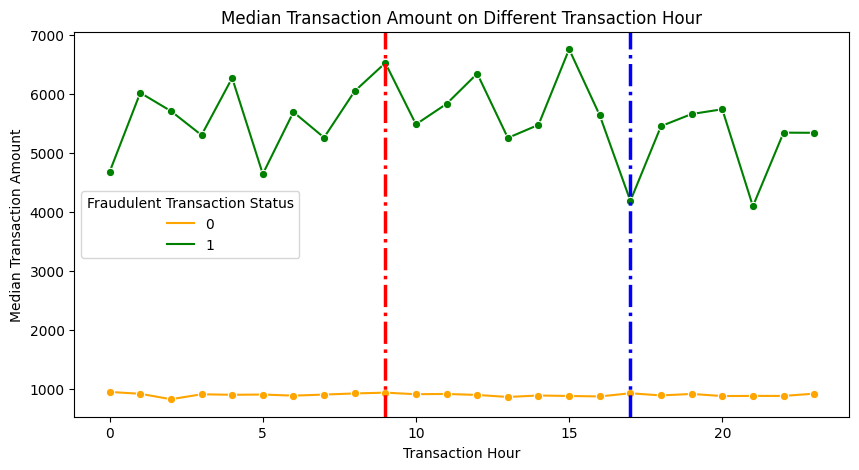

In [39]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.lineplot(data = hour_med_amount, x = 'transaction_hour', y = 'amount', hue = 'is_fraud', linestyle = '-', marker = 'o',
            palette = ['orange', 'green'])
plt.axvline(x = 9, color = 'r', linestyle = '-.', linewidth = 2.5) ## Bank Opening Time
plt.axvline(x = 17, color = 'b', linestyle = '-.', linewidth = 2.5) ## Bank Closing Time
plt.legend(title = 'Fraudulent Transaction Status')
plt.title('Median Transaction Amount on Different Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Median Transaction Amount')
plt.show()

Median transaction amount has been always greater for fraudulent transactions than that of normal transactions regardless of transaction hour. During the bank operating hour (9AM - 5PM), the median transaction amount is the highest (at 3PM) but there is no significant trend on such bank operating hour affecting on transaction amount. 
> ***Transaction Amount is higher on fraudulent transactions than that of normal transactions***

In [40]:
## Find out median transaction frequency on different transaction hours
hour_med_frequency = transaction_sample.groupby(['transaction_hour', 'is_fraud'])[['num_transactions']].agg('median').reset_index()
hour_med_frequency

,transaction_hour,is_fraud,num_transactions
0,0,0,302.0
1,0,1,288.0
2,1,0,316.0
3,1,1,293.0
4,2,0,309.0
5,2,1,313.0
6,3,0,308.0
7,3,1,318.0
8,4,0,299.0
9,4,1,312.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

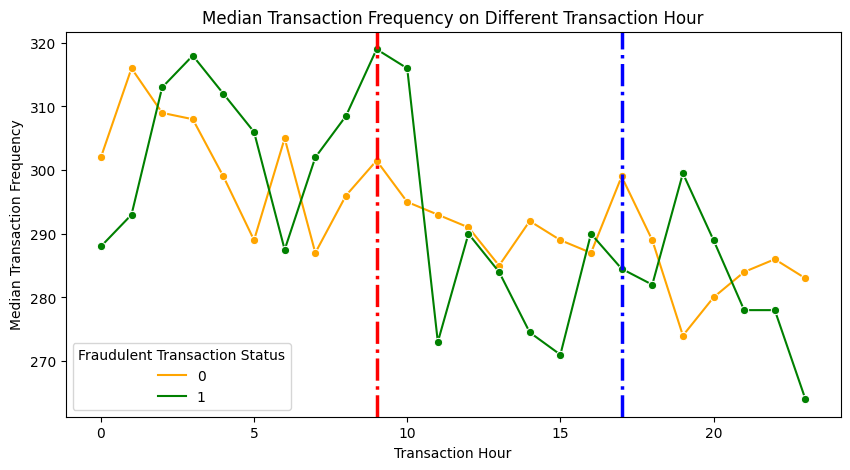

In [41]:
## Visualisation
plt.figure(figsize = (10, 5))
sns.lineplot(data = hour_med_frequency, x = 'transaction_hour', y = 'num_transactions', hue = 'is_fraud', linestyle = '-', marker = 'o',
            palette = ['orange', 'green'])
plt.axvline(x = 9, color = 'r', linestyle = '-.', linewidth = 2.5) ## Bank Opening Time
plt.axvline(x = 17, color = 'b', linestyle = '-.', linewidth = 2.5) ## Bank Closing Time
plt.legend(title = 'Fraudulent Transaction Status')
plt.title('Median Transaction Frequency on Different Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Median Transaction Frequency')
plt.show()

> ***No big significant trend on transaction frequency on and off bank operating time***

but key thing to notice is
* Transaction Frequency is extremely high for fraudulent transactions at the start of bank operating time
* Transaction Frequency is higher for normal transactions at the end of bank operating time

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

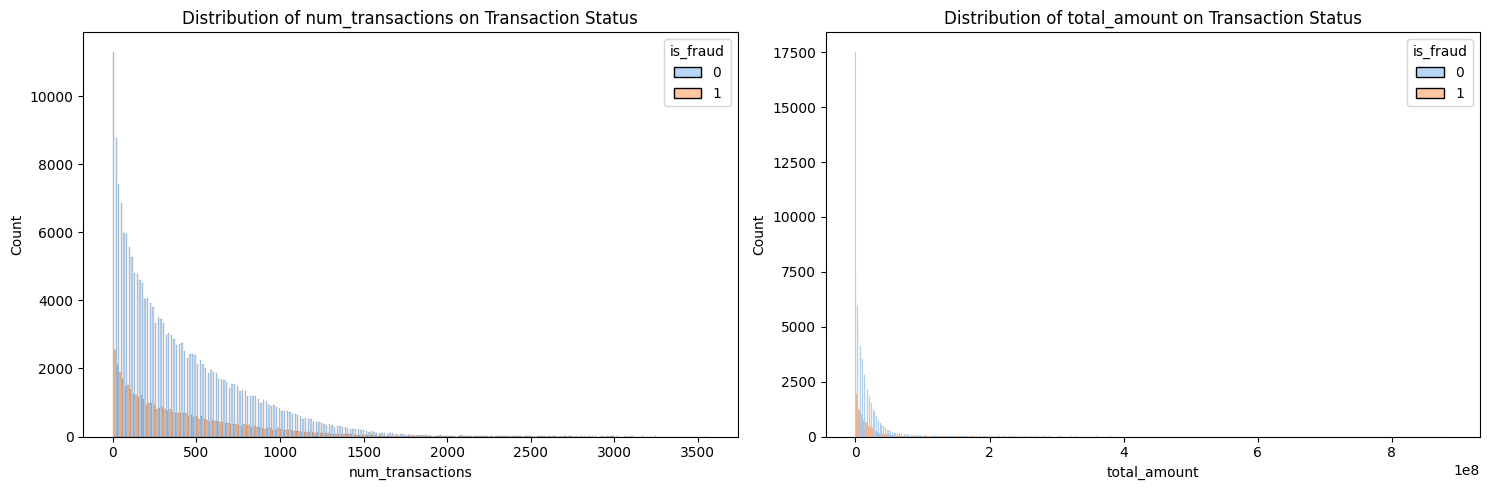

In [42]:
## Compare general distribution of transaction frequencies and total amount spent last hour 
ex_cols = ['num_transactions', 'total_amount']

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(ex_cols):
    sns.histplot(data = transaction_sample, x = col, hue = 'is_fraud', multiple = 'dodge', kde = False, palette = 'pastel', legend = True, 
                 element = 'bars', ax = axes[i])
    axes[i].set_title(f'Distribution of {col} on Transaction Status')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

> ***There seems to be no particular trend on distribution of transaction frequencies and total amount spent during last hours on different transaction status.***

Now I will perform steps on feature scaling, engineering, etc.

# Feature Engineering

In [43]:
transaction_sample.head()

,merchant_category,merchant_type,merchant,amount,currency,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond
0,Entertainment,streaming,Spotify,169.37,EUR,Germany,Unknown City,medium,Premium Debit,0,Firefox,web,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495
1,Restaurant,premium,Ruth's Chris,823.67,CAD,Canada,Unknown City,medium,Platinum Credit,0,Chrome,web,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017
2,Entertainment,streaming,Spotify,21948.66,RUB,Russia,Unknown City,medium,Gold Credit,0,Safari,web,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556
3,Healthcare,medical,Lab Corp,1602.46,NGN,Nigeria,Unknown City,medium,Premium Debit,0,Edge,web,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515
4,Restaurant,casual,Applebee's,89.80,SGD,Singapore,Unknown City,medium,Basic Debit,0,Firefox,web,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924


The current transaction amount is represented in its own local currency in which new feature should be generated using the standard USD

In [44]:
transaction_sample['currency'].unique()

array(['EUR', 'CAD', 'RUB', 'NGN', 'SGD', 'MXN', 'USD', 'BRL', 'AUD',
       'JPY', 'GBP'], dtype=object)

In [45]:
def convert_currency_amt(transaction_sample):
    # Define the conversion rates for each currency
    conversion_rates = {
        'EUR': 1.06,
        'CAD': 0.72,
        'RUB': 0.01,
        'NGN': 0.0006,
        'SGD': 0.75,
        'MXN': 0.049,
        'BRL': 0.17,
        'AUD': 0.65,
        'JPY': 0.0065
    }
    
    # Add a column by mapping the currency to the corresponding conversion rate,
    # defaulting to 1.28 for Great Britain Pound if currency is not in the dictionary
    transaction_sample['USD_converted_amount'] = transaction_sample['amount'] * \
                                                 transaction_sample['currency'].map(conversion_rates).fillna(1.28)
    transaction_sample.drop(['amount', 'currency'], axis = 1, inplace = True)
    return transaction_sample

# Run the function
transaction_sample = convert_currency_amt(transaction_sample)

In [46]:
transaction_sample['USD_converted_amount'].describe()

count    250000.000000
mean        537.578000
std         714.944939
min           0.002424
25%         167.158275
50%         353.857950
75%         621.011600
max       19154.073600
Name: USD_converted_amount, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


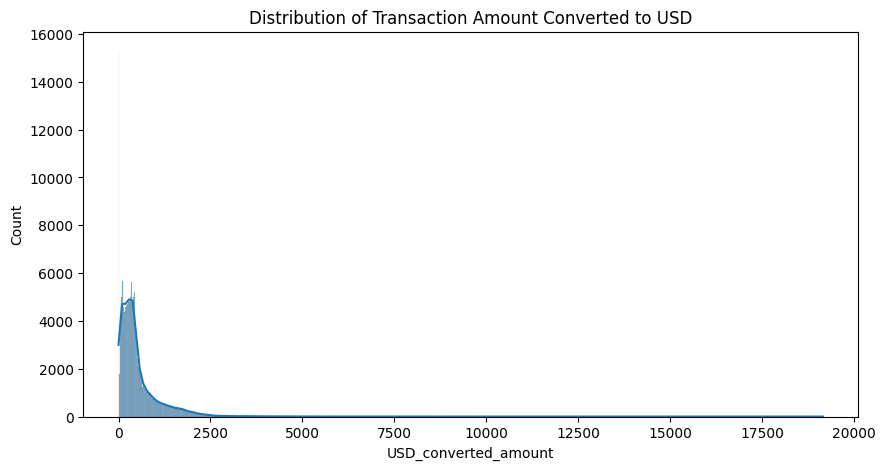

In [47]:
plt.figure(figsize = (10, 5))
sns.histplot(data = transaction_sample, x = 'USD_converted_amount', kde = True)
plt.title('Distribution of Transaction Amount Converted to USD')
plt.show()

Now it seems that the distribution of transaction amount has come alright compared to how it was shown before during EDA

In [48]:
## Add a new column indicating whether bank is operating or not
def is_bank_operating(transaction_sample):
    transaction_sample['is_bank_operating'] = np.where(
        transaction_sample['transaction_hour'] < 9, 0,
        np.where(transaction_sample['transaction_hour'] <= 17, 1, 0)
    )
    return transaction_sample

# Apply the function
transaction_sample = is_bank_operating(transaction_sample)

In [49]:
## Check if there are no NA values
transaction_sample.isna().sum()

merchant_category       0
merchant_type           0
merchant                0
country                 0
city                    0
city_size               0
card_type               0
card_present            0
device                  0
channel                 0
distance_from_home      0
high_risk_merchant      0
transaction_hour        0
weekend_transaction     0
is_fraud                0
num_transactions        0
total_amount            0
unique_merchants        0
unique_countries        0
max_single_amount       0
year                    0
month                   0
day                     0
hour                    0
minute                  0
second                  0
microsecond             0
USD_converted_amount    0
is_bank_operating       0
dtype: int64

In [50]:
## Check if any column has duplicating values
transaction_sample.duplicated().sum()

0

Considering 0 number of NA values along with 0 duplicating values, there is no need for iterative method to fill NAs

Now I will attempt to convert categorical variables into integers by dividing the categorical variables into ordinal and nomial categorical variables.

In [51]:
transaction_sample['card_type'].unique()

array(['Premium Debit', 'Platinum Credit', 'Gold Credit', 'Basic Debit',
       'Basic Credit'], dtype=object)

In [52]:
## Ordinal Categorical Variable
transaction_sample['card_type'] = transaction_sample['card_type'].map({
    'Premium Debit' : 4, 
    'Platinum Credit' : 3,
    'Gold Credit' : 2,
    'Basic Debit' : 1,
    'Basic Credit' : 0
})

In [53]:
transaction_sample['merchant'].unique()

array(['Spotify', "Ruth's Chris", 'Lab Corp', "Applebee's", 'Chevron',
       'eBay', 'Rite Aid', 'Whole Foods', 'Highway Gas Stop',
       'DuaneReade', 'Mobil', "Macy's", 'Local Gas Station',
       'CVS Pharmacy', 'Hotels.com', 'American Airlines', 'edX',
       'FreshDirect', 'Barnes & Noble', 'Safeway', 'BP', 'AMC Theaters',
       'United Airlines', 'Walmart Grocery', 'Udemy', 'Aldi',
       'Red Lobster', 'Southwest', 'Enterprise Rent-A-Car', 'Hilton',
       'Delta', 'Skillshare', 'Amazon', 'Urgent Care', 'Nobu',
       'Amazon Fresh', 'Walgreens', 'Olive Garden', 'Nintendo eShop',
       'PlayStation Store', 'Etsy', 'University Bookstore', 'Marriott',
       'Subway', 'Netflix', 'Wayfair', 'Epic Games', 'Target', 'Coursera',
       'Local Hospital', 'Instacart', 'JetBlue', 'Sheraton', 'StubHub',
       'Chegg', 'Nike Store', 'IKEA', 'AliExpress', 'Food Lion',
       "Wendy's", 'Xbox Live', 'Apple Music', 'Capital Grille',
       'Ticketmaster', 'Amazon Prime', 'Steam', 'TGI Fr

knowing that there are so many merchants, I decided to only limit top 20 merchants

In [54]:
# Identify top merchants based on frequency or other criteria
top_merchants = transaction_sample['merchant'].value_counts().nlargest(20).index

# Replace merchants not in top_merchants with "Other"
transaction_sample['merchant'] = transaction_sample['merchant'].apply(lambda x: x if x in top_merchants else 'Other')

# One-hot encode
transaction_sample = pd.get_dummies(transaction_sample, columns=['merchant'], prefix='merchant', dtype = 'int')

In [55]:
transaction_sample.head()

,merchant_category,merchant_type,country,city,city_size,card_type,card_present,device,channel,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond,USD_converted_amount,is_bank_operating,merchant_Amazon Fresh,merchant_Barnes & Noble,merchant_CVS Pharmacy,merchant_Chegg,merchant_DuaneReade,merchant_FreshDirect,merchant_Highway Gas Stop,merchant_Instacart,merchant_Lab Corp,merchant_Local Gas Station,merchant_Local Hospital,merchant_MasterClass,merchant_Medical Center,merchant_Other,merchant_Rite Aid,merchant_Truck Stop,merchant_University Bookstore,merchant_Urgent Care,merchant_Walgreens,merchant_Walmart Grocery,merchant_edX
0,Entertainment,streaming,Germany,Unknown City,medium,4,0,Firefox,web,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495,179.532200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,Restaurant,premium,Canada,Unknown City,medium,3,0,Chrome,web,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017,593.042400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Entertainment,streaming,Russia,Unknown City,medium,2,0,Safari,web,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556,219.486600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Healthcare,medical,Nigeria,Unknown City,medium,4,0,Edge,web,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515,0.961476,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,Restaurant,casual,Singapore,Unknown City,medium,1,0,Firefox,web,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924,67.350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


knowing that I will use Tree based models for this project, it would be better to use one hot encoding which the tree based models can deal with well. So I will continue to use one hot encoding on rest of the nominal categorical variables

In [56]:
## Perform One-Hot Encoding on categorical variables
transaction_cleaned = pd.get_dummies(transaction_sample, dtype = 'int')

In [57]:
transaction_cleaned.head()

,card_type,card_present,distance_from_home,high_risk_merchant,transaction_hour,weekend_transaction,is_fraud,num_transactions,total_amount,unique_merchants,unique_countries,max_single_amount,year,month,day,hour,minute,second,microsecond,USD_converted_amount,is_bank_operating,merchant_Amazon Fresh,merchant_Barnes & Noble,merchant_CVS Pharmacy,merchant_Chegg,merchant_DuaneReade,merchant_FreshDirect,merchant_Highway Gas Stop,merchant_Instacart,merchant_Lab Corp,merchant_Local Gas Station,merchant_Local Hospital,merchant_MasterClass,merchant_Medical Center,merchant_Other,merchant_Rite Aid,merchant_Truck Stop,merchant_University Bookstore,merchant_Urgent Care,merchant_Walgreens,merchant_Walmart Grocery,merchant_edX,merchant_category_Education,merchant_category_Entertainment,merchant_category_Gas,merchant_category_Grocery,merchant_category_Healthcare,merchant_category_Restaurant,merchant_category_Retail,merchant_category_Travel,merchant_type_airlines,merchant_type_booking,merchant_type_casual,merchant_type_events,merchant_type_fast_food,merchant_type_gaming,merchant_type_hotels,merchant_type_local,merchant_type_major,merchant_type_medical,merchant_type_online,merchant_type_pharmacy,merchant_type_physical,merchant_type_premium,merchant_type_streaming,merchant_type_supplies,merchant_type_transport,country_Australia,country_Brazil,country_Canada,country_France,country_Germany,country_Japan,country_Mexico,country_Nigeria,country_Russia,country_Singapore,country_UK,country_USA,city_Chicago,city_Dallas,city_Houston,city_Los Angeles,city_New York,city_Philadelphia,city_Phoenix,city_San Antonio,city_San Diego,city_San Jose,city_Unknown City,city_size_large,city_size_medium,device_Android App,device_Chip Reader,device_Chrome,device_Edge,device_Firefox,device_Magnetic Stripe,device_NFC Payment,device_Safari,device_iOS App,channel_mobile,channel_pos,channel_web
0,4,0,0,1,17,0,0,27,2.527161e+06,21,6,1.897486e+06,2024,10,7,17,14,22,181495,179.532200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,3,0,0,0,14,0,0,437,1.567628e+07,102,12,1.491427e+06,2024,10,16,14,20,16,817017,593.042400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,2,0,0,1,16,0,0,6,3.404636e+05,6,5,2.592671e+05,2024,10,30,16,30,10,768556,219.486600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,4,0,1,0,8,0,1,944,2.583898e+07,105,12,1.871011e+06,2024,10,3,8,21,32,928515,0.961476,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,22,0,0,148,2.367273e+06,71,11,6.834904e+05,2024,10,8,22,41,26,566924,67.350000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [58]:
transaction_cleaned.isna().any(axis = 1).sum()

0

In [59]:
transaction_cleaned.duplicated().sum()

0

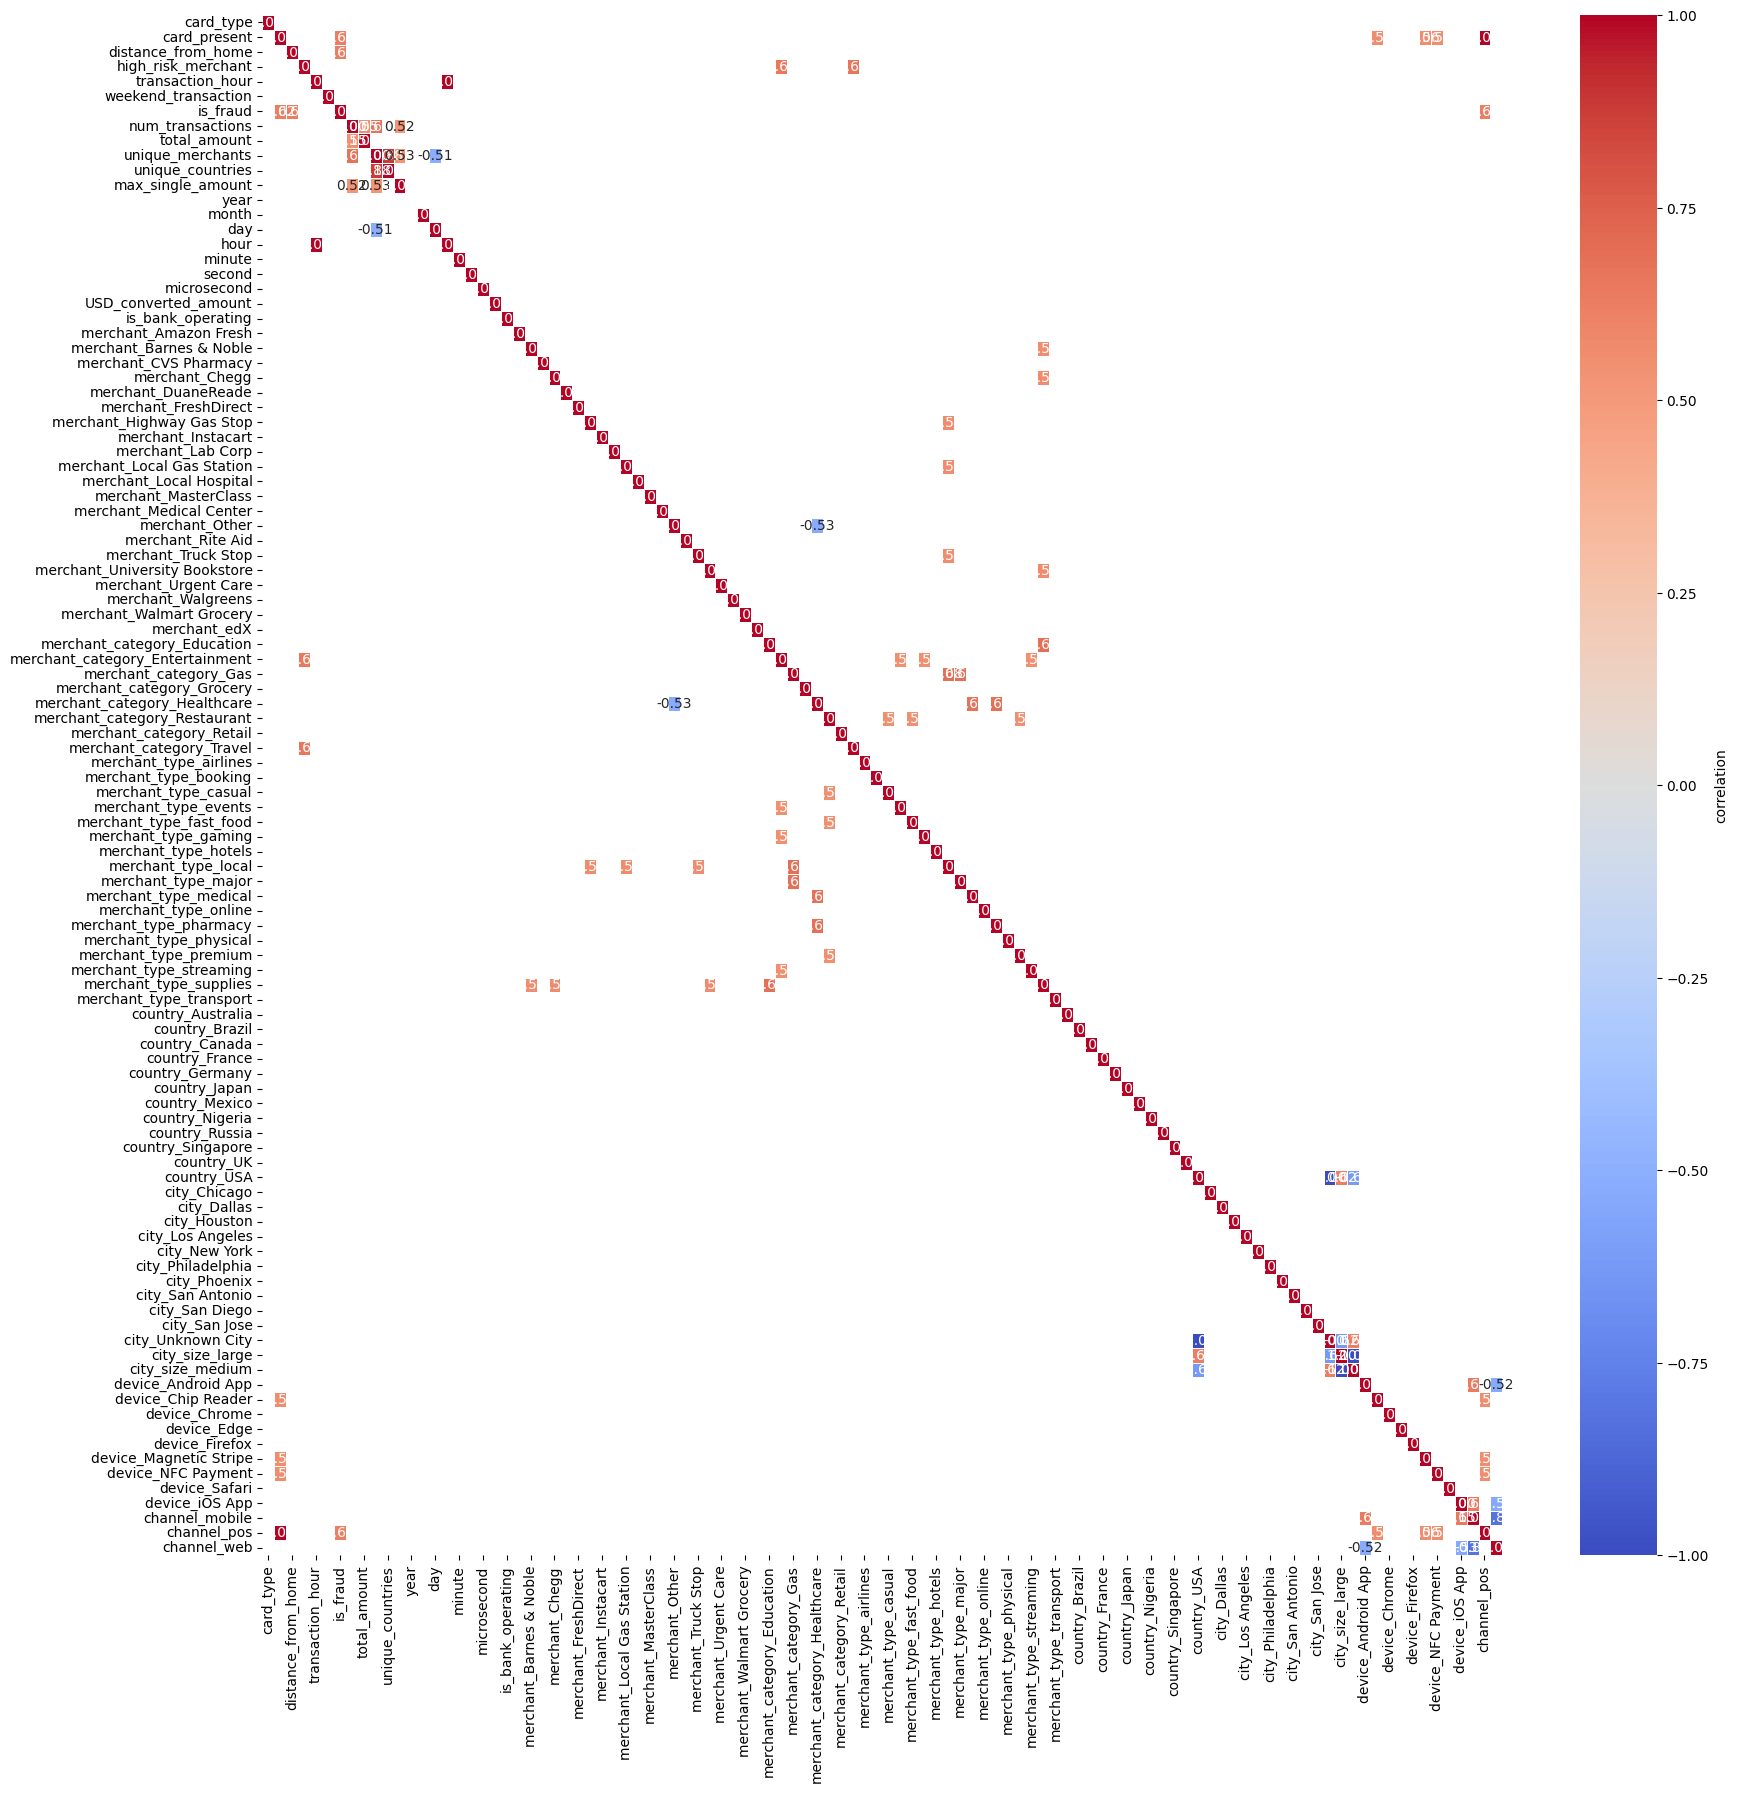

In [60]:
## Heatmap Creation to perform multivariate analysis
transaction_corr = transaction_cleaned.corr()

# Set up a threshold to limit uncorrelated values to be visible
threshold = 0.5

# Filter the possible correlations
filtered_corr = transaction_corr[abs(transaction_corr) >= 0.5]

# Visualisation
plt.figure(figsize = (20, 20))
sns.heatmap(filtered_corr, vmin = -1, vmax = 1, annot = True, fmt = '.2f', linewidth = 0.5, mask = filtered_corr.isnull(), 
           cmap = 'coolwarm', cbar_kws = {'label' : 'correlation'})
plt.show()

* **num_transactions weakly correlated with total amount and unique merchants, max single amount**

* **distance from home and card presence status is correlated with transaction status**s

* **distance from home is highly correlated with POS system**em


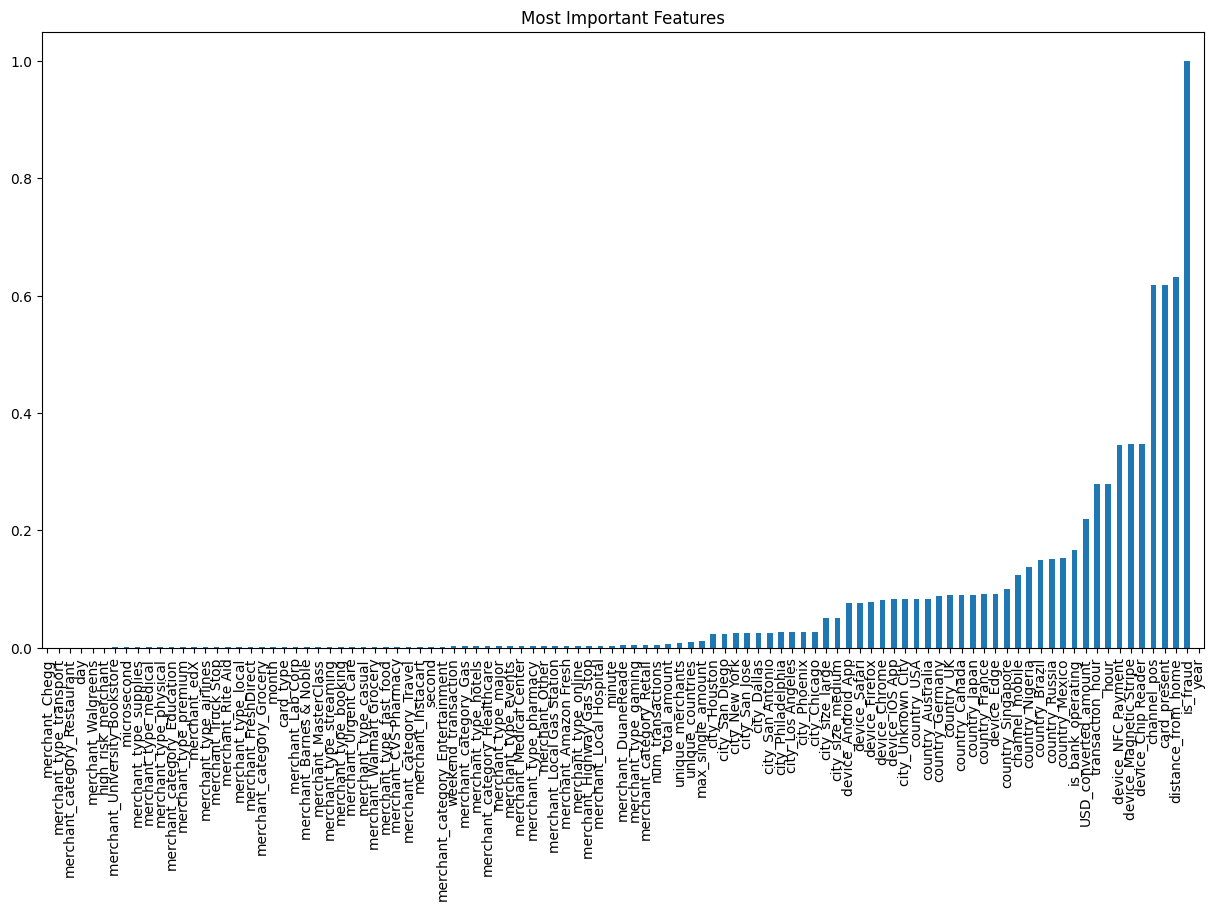

In [61]:
## Select only necessary features with its threshold greater than 0.25
plt.figure(figsize = (15, 8))
transaction_corr['is_fraud'][:-1].abs().sort_values().plot(kind = 'bar', title = 'Most Important Features')
plt.show()

In [62]:
## Select only 20 important features into list
selected_features = transaction_corr['is_fraud'][:-1].abs().sort_values().tail(22)
sel_feature_cols = selected_features.reset_index()['index']
sel_feature_cols

0             country_Canada
1              country_Japan
2             country_France
3                device_Edge
4          country_Singapore
5             channel_mobile
6            country_Nigeria
7             country_Brazil
8             country_Russia
9             country_Mexico
10         is_bank_operating
11      USD_converted_amount
12          transaction_hour
13                      hour
14        device_NFC Payment
15    device_Magnetic Stripe
16        device_Chip Reader
17               channel_pos
18              card_present
19        distance_from_home
20                  is_fraud
21                      year
Name: index, dtype: object

# Splitting Training & Testing Data

In [63]:
## Define X & y variable
X = transaction_cleaned[sel_feature_cols]
X.drop(columns = ['is_fraud', 'year'], axis = 1, inplace = True)
y = transaction_cleaned['is_fraud']

# Split X & y into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 97)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200000, 20) (50000, 20) (200000,) (50000,)


/tmp/ipykernel_24/3696666106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns = ['is_fraud', 'year'], axis = 1, inplace = True)


In [64]:
## Use of SMOTE to upsample the data
ros = RandomOverSampler(random_state = 97)
X_train, y_train = ros.fit_resample(X_train, y_train)
print(f'Percentage of Fraudulent Transaction : {y_train.value_counts(normalize = True)[0] * 100}%')
print(f'Percentage of Normal Transaction : {y_train.value_counts(normalize = True)[1] * 100}%')

Percentage of Fraudulent Transaction : 50.0%
Percentage of Normal Transaction : 50.0%


In [65]:
## Use of MinMaxScaler to Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\nClassification Report: \n",classification_report(y_test, y_pred))
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print("AUC:", roc_auc_score(y_test, y_pred))
    print(f"F1-Score: {f1_score(y_test, y_pred)}")
    print('')
          
    
    # ROC Curve
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(cm,display_labels= model.classes_)
    disp.plot()
    plt.show()

Evaluation on Random Forest Classifier


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     40066
           1       0.86      0.86      0.86      9934

    accuracy                           0.94     50000
   macro avg       0.91      0.91      0.91     50000
weighted avg       0.94      0.94      0.94     50000

Recall: 0.8566539158445742
AUC: 0.9105937177685406
F1-Score: 0.8567832871885225



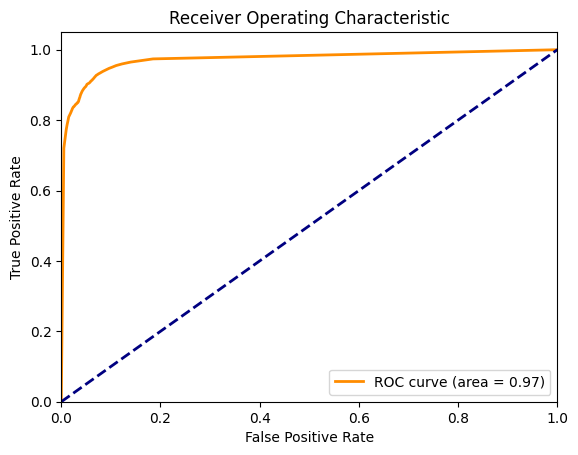

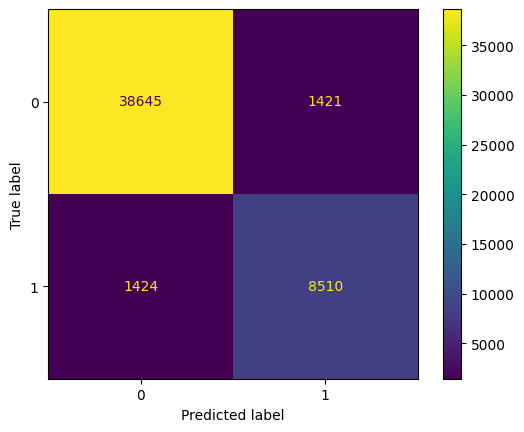

In [67]:
# Initialize and fit Random Forest classifier for anomaly detection
rf = RandomForestClassifier(n_estimators=100, random_state=42)

print(f'Evaluation on Random Forest Classifier\n')
evaluate_model(rf, X_train, X_test, y_train, y_test)

Evaluation on AdaBoost Classifier


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     40066
           1       0.81      0.93      0.87      9934

    accuracy                           0.94     50000
   macro avg       0.90      0.94      0.91     50000
weighted avg       0.95      0.94      0.94     50000

Recall: 0.9333601771693175
AUC: 0.9390881153405116
F1-Score: 0.8658542279497594



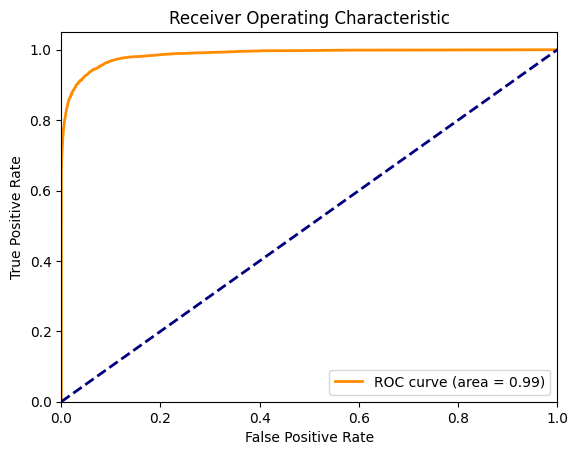

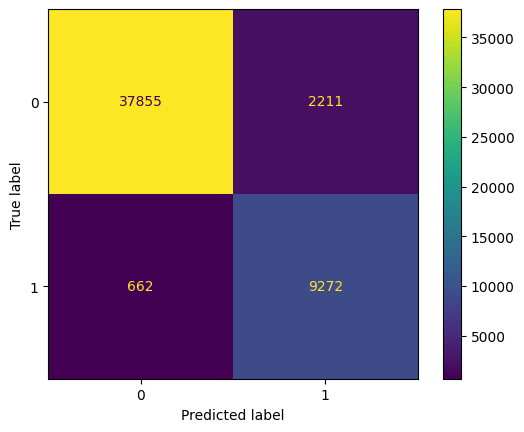

In [68]:
# Initialize and fit AdaBoost classifier for anomaly detection
ada = AdaBoostClassifier(n_estimators=100, random_state=42)

print(f'Evaluation on AdaBoost Classifier\n')
evaluate_model(ada, X_train, X_test, y_train, y_test)

Evaluation on Gradient Boosting


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     40066
           1       0.82      0.94      0.87      9934

    accuracy                           0.95     50000
   macro avg       0.90      0.94      0.92     50000
weighted avg       0.95      0.95      0.95     50000

Recall: 0.939400040265754
AUC: 0.9433934260131744
F1-Score: 0.8732104425938055



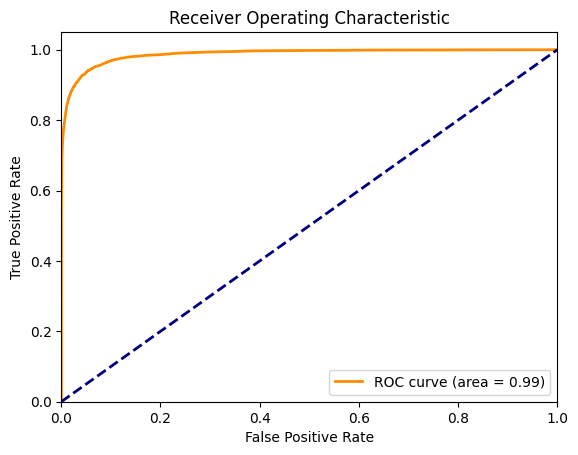

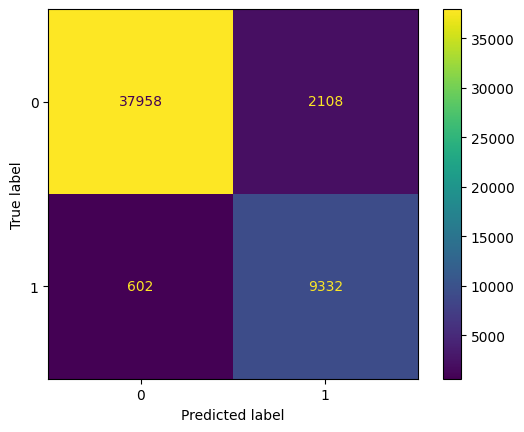

In [69]:
# Initialize and fit Gradient Boosting classifier for anomaly detection
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

print(f'Evaluation on Gradient Boosting\n')
evaluate_model(gb, X_train, X_test, y_train, y_test)

Evaluation on Decision Tree


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     40066
           1       0.85      0.85      0.85      9934

    accuracy                           0.94     50000
   macro avg       0.91      0.90      0.91     50000
weighted avg       0.94      0.94      0.94     50000

Recall: 0.8454801691161667
AUC: 0.904495188636354
F1-Score: 0.8485981308411216



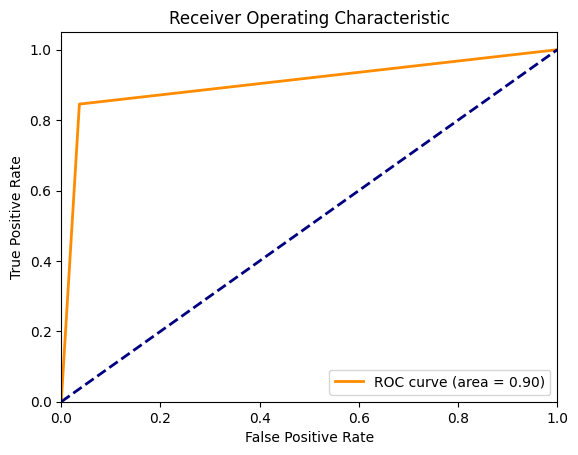

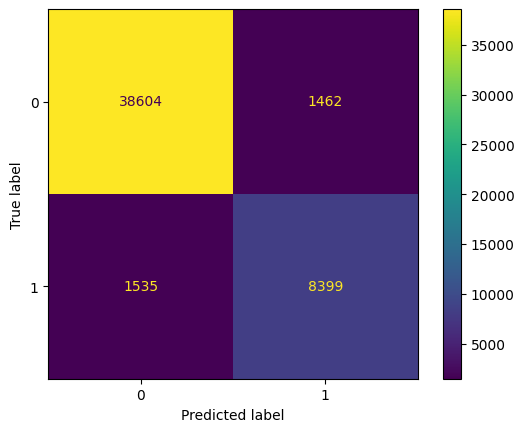

In [70]:
# Initialize and fit Decision Tree classifier for anomaly detection
dt = DecisionTreeClassifier(random_state=42)

print(f'Evaluation on Decision Tree\n')
evaluate_model(dt, X_train, X_test, y_train, y_test)

Knowing that we have dealt with our problem with supervised learning, I will now attempt to use neural network to draw some extensive conclusion.

In [71]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=20))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Fit the Neural Network
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Epoch 1/10


I0000 00:00:1731827552.495363      74 service.cc:145] XLA service 0x7c07a800fe00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731827552.495419      74 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1731827552.495424      74 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 103/3206 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8449 - loss: 0.5133

I0000 00:00:1731827553.502066      74 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3206/3206 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9068 - loss: 0.2520 - val_accuracy: 0.9123 - val_loss: 0.2234
Epoch 2/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9191 - loss: 0.2109 - val_accuracy: 0.9160 - val_loss: 0.2193
Epoch 3/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9196 - loss: 0.2093 - val_accuracy: 0.9184 - val_loss: 0.2058
Epoch 4/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9209 - loss: 0.2041 - val_accuracy: 0.9194 - val_loss: 0.1971
Epoch 5/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9203 - loss: 0.2036 - val_accuracy: 0.9210 - val_loss: 0.1873
Epoch 6/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9211 - loss: 0.2006 - val_accuracy: 0.9213 - val_loss: 0.1879
Epoch 7/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9217 - loss: 0.1981 - val_accuracy: 0.9211 - val_loss: 0.1975
Epoch 8/10
3206/3206 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9217 - loss: 0.1943 - val_accurac

[]

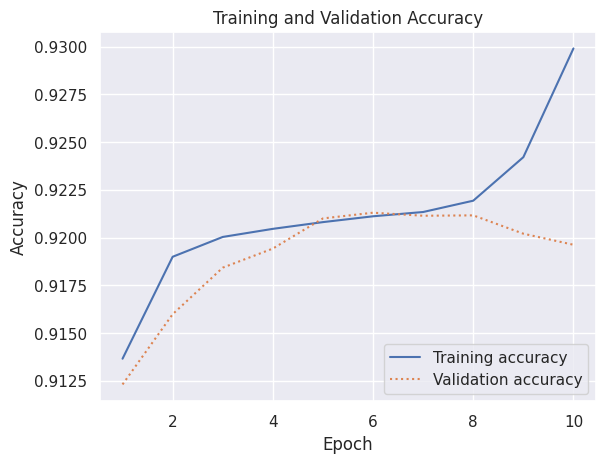

In [73]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

A typical accuracy score computed by divding the sum of the true positives and true negatives by the number of test samples isn't very helpful because the dataset is so imbalanced. Fraudulent transactions represent less than 0.2% of all the samples, which means that the model could simply guess that every transaction is legitimate and get it right about 99.8% of the time. However knowing that I have upsampled the label data so that the distribution is 50 50, the model accuracy shows some impressive result.